In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, Markdown

import pandas as pd
import numpy as np

import json

np.__version__

'1.19.5'

# PREP: data

In [2]:
TO_NUM_CONVERSION = {
    'mixed': 'x',
    'female': 'f',
    'male': 'm',
    'unknown': 'x'
}

In [3]:
gender_df = pd.read_csv('./data/11-OUTPUT-with-gender-from-gpt4.csv')
date_as_decimal = (gender_df.chart_debut_date_normalized_0_to_1 / 100) * (2023 - 1959) + 1959
date_as_decimal
gender_df['date_as_decimal'] = date_as_decimal
gender_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14,m,1975.28800
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14,m,1975.28800
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0,m,1975.28800
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14,m,1975.28800
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0,m,1975.28800
...,...,...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0,m,2021.43968
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0,m,2021.43968
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5,m,2021.43968
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0,m,2021.43968


# PREP: implement dataviz helpers

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:

# unclear if any change
endearments = {"x":[68.41437686488501,70.60785278424815],"y":[37.41337593941116,38.656998447264364]}
hope = {"x":[63.82054821612978,64.7455660983335],"y":[34.10020481305155,34.62465691590811]}
king_and_queen = {"x":[37.16232335742171,39.00723683780778],"y":[47.32136770032542,48.36736775393717]}
this_topic_does_not_matter = {"x":[69.40281662040354,70.7281775003339],"y":[55.34667073773606,56.09810302233943]}

# increases
money = {"x":[44.373966474543344,46.89578417179803],"y":[51.32652039574649,53.620313395218965]}
bling = {"x":[36.830222358561755,38.98558104895179],"y":[50.51323309248308,52.473702590635526]}


# decrease
trains = {"x":[33.81003871731829,35.12548575198946],"y":[44.21206344977864,44.95787493818595]}
mail_letters = {"x":[75.49889146108401,78.36359380070401],"y":[51.102477133812194,52.72666104957888]}
crying = {"x":[47.221939675414774,51.22855843986578],"y":[63.95499696143897,66.2266067073554]}
smooching = {"x":[42.29274375515004,46.38922509120185],"y":[58.50912291912832,60.83168153376482]}
needing = {"x":[57.85203081147183,68.59043312238205],"y":[53.57181173663452,63.01788684302827]} # w/ filter_term="need"

# flashes
the_twist = {"x":[43.44424212685903,45.81103037181394],"y":[27.42601396768172,29.578795397291564]}
independent_woman_island = {"x":[71.20540790090061,72.75890439110405],"y":[59.97026713004826,60.843451387521554]}

# peaks
apology = {"x":[74.22341143872275,76.60246085972018],"y":[54.42211974817969,55.770955803834475]}
lonesomeness = {"x":[46.83177410717391,51.25894554602522],"y":[60.27980592534157,62.78985401790457]}
summer = {"x":[38.33223185597551,39.937022657569045],"y":[56.732321042928035,57.64218011347436]}
heart_and_soul = {"x":[51.29575376990074,54.630406727410495],"y":[63.39077685082963,66.42390792050726]}
heaven = {"x":[41.952352805865246,44.28253666093067],"y":[62.549830960924254,64.66931779776084]}
freedom = {"x":[48.863729693018406,50.7200475836808],"y":[57.927640223430984,59.61610842120449]} # sudden drop
american_south = {"x":[40.30689751115798,41.25062601956011],"y":[40.768192046759836,41.626587896837336]} # has gap
love_lagoon = {"x":[56.88552518777873,67.59223863239565],"y":[57.13397513383038,66.87257930547837]}
cars = {"x":[44.044606219695126,47.000345426390915],"y":[42.78399083352829,44.44534311900742]}

hop_hop_life_in_the_hood = {"x":[39.698309945228786,45.50745922012898],"y":[45.067706350111685,49.010322023657835]}



In [6]:
def filter_to_range(df, lower, upper):
    return df[
        (df.date_as_decimal > lower) &
        (df.date_as_decimal < upper)
    ].sort_values(by=['date_as_decimal'])

# [PERSONAL CONNECTIONS TO THIS PIECE]

### David 

In my own life, I've grabbled with identifying & taking control of the gender roles & views of romance I've been given.

The extend to which I can identify what I really value, what is really healthy for me & my partner, I'm able to thrive.

I'm fascinated to see how the discourse around romance has shifted in the last decades, as culture & generations have changed so much.

I also feel like there's a very trite feeling of, "Songs are about sex & twerking now. The old days were so much simpler, better."

Without trying to attack that directly, I want to dig more deeply into *what* is happening in terms of love songs & non-love songs over time. I think there's an opportunity to see deeper into popular culture, and the shift that's really at play.


### Michelle Jia


# [LINK TO INTERACTIVE LYRIC MAP](https://davidnmora.github.io/lyric-viz/)

# Pop seems to have changed a ton, and one of the biggest aspects is the apprent decline of the love song

For many (especially Boomers), this feels like an overall loss of innocents & morals in favorite of hyper-sexualization, money, and cussing:

Says one comment on *[The Shirelles - Will You Still Love Me Tomorrow (1961)](https://www.youtube.com/watch?v=PAxb1vnb520)*:

> beautiful piece, no twerking, no cussing, just pure innocence and talent.

Just look:

<img src="./images/lesley-gore.png"  width="500">

### 1963 -- Lesley Gore sings "She's A Fool" on The Ed Sullivan Show

It's about waiting patiently for a man to leave a women who doesn't appreciate that her man is 
> the best thing in the whole wide world.

Alas, this man's girlfriend
> doesn't realize she's a lucky girl

No cussing, no twerking, just "pure innocence"...

<img src="./images/latto-big-energy.png"  width="500">

### Fast forward to 2021 -- Latto debuts "Big Energy" in a Pop landscape where innocent love songs seem supplanted by bragadocious artists flaunting their sexual prowess:

In it, she fires a cupid arrow at a literal wall of hot guys, while singing

> "Ain't too many n**** who can handle me"

and 

> On the count of three, bad bitches get money (get money)  
> Broke niggas to the left, we 'on't want it (hell nah)  
> If you ever see me broke, I'm prolly rocking a cast  
> Pretty face, no waist, with a big ol' bag, ha



# But, from the 60's to today *have love songs really declined*? And if so, what are we singing about instead, and what artists or genres are behind this change?

Some housekeeping: we'll define "love song" using wikipedia's definition:

> a love song is a song about  
romantic love,  
falling in love,  
heartbreak after a breakup,  
and the feelings that these experiences bring.


# EXPLORATION: How do you identifying a "love song"?

### NOTE: there's generally a *decline in total unique songs in the Top 10* over time (ie a smaller subset of songs dominate as time goes on)

# *Simplest ID method*: Does at least one lyric in the song contain the word "love"?

In [7]:
IS_LOVE_SONG_COL = 'is_love_song'

def contains_love(lyric_lines):
    # Short-circuit as soon as "love" is found in any lyric line.
    return any('love' in lyric.lower() for lyric in lyric_lines)

def list_unique_songs_labeled_if_they_contain_the_word_love(df):
        # Create a boolean mask indicating whether each lyric line contains "love".
    df['contains_love'] = df['lyric_line'].str.contains('love', case=False)
    
    # Define aggregation functions for each column
    # - 'contains_love' will use 'any' to find if any lyric line contains 'love'
    # - other columns will use 'first' to take the first value from each group
    agg_functions = {col: 'first' for col in df.columns if col not in ['contains_love', 'lyric_line']}
    agg_functions['contains_love'] = 'any'
    
    # Group by 'performer' and 'song' and apply aggregation functions
    result = df.groupby(['performer', 'song']).agg(agg_functions)#.reset_index()
    
    # Rename 'contains_love' column to 'is_love_song'
    result.rename(columns={'contains_love': IS_LOVE_SONG_COL}, inplace=True)
    
    return result.reset_index(drop=True)

# Example DataFrame with additional columns
data = {
    'lyric_line': ['I love you', 'This is a test', 'Love is in the air', 'No mentions here', 'Love', 'Something else'],
    'performer': ['Artist1', 'Artist1', 'Artist2', 'Artist2', 'Artist3', 'Artist3'],
    'song': ['Song1', 'Song1', 'Song2', 'Song2', 'Song3', 'Song3'],
    'album': ['Album1', 'Album1', 'Album2', 'Album2', 'Album3', 'Album3'],
    'year': [2000, 2000, 2005, 2005, 2010, 2010]
}

# Create DataFrame
df = pd.DataFrame(data)

# Transform DataFrame
list_unique_songs_labeled_if_they_contain_the_word_love(df)

,performer,song,album,year,is_love_song
0,Artist1,Song1,Album1,2000,True
1,Artist2,Song2,Album2,2005,True
2,Artist3,Song3,Album3,2010,True


In [8]:
ENTIRE_CHART_BBOX = {"x":[-2.862627270141111,126.29481148663372],"y":[12.152482533476716,85.38013754289815]}
MIN_YEAR = 1958
MAX_YEAR = 2023
NUM_BINS = (MAX_YEAR - MIN_YEAR) 

def viz_love_song_density_by_gender(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    # ONLY USE LOVE SONGS
    filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.is_love_song == True]
    male = filtered_to_bbox[filtered_to_bbox.gender == 'm']
    female = filtered_to_bbox[filtered_to_bbox.gender == 'f']
#     mixed = filtered_to_bbox[filtered_to_bbox.gender == 'x']

    if subplot:
        plt.subplot(subplot)
    sns.distplot(male.date_as_decimal, bins=NUM_BINS, color='blue')
    sns.distplot(female.date_as_decimal, bins=NUM_BINS, color='pink')
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    plt.title('Love songs *density*, by gender')
    return filtered_to_bbox
    
def viz_love_song_absolute_by_gender(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
     # ONLY USE LOVE SONGS
    filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.is_love_song == True]
    
    if subplot:
        plt.subplot(subplot)
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    # Define color palette
    palette = {"m": "blue", "f": "pink", "x": "gray"}

    # Use this palette in your plot
    sns.histplot(data=filtered_to_bbox, x="date_as_decimal", 
                 kde=True, hue="gender", palette=palette, alpha=0.7, bins=NUM_BINS, hue_order = ["x",  "f", "m"])
    plt.title('Love songs count, by gender')
    return filtered_to_bbox

def viz_bbox_absolute_NO_GENDER_SPLIT(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    
    if subplot:
        plt.subplot(subplot)
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    # Define color palette
#     palette = {"m": "blue", "f": "pink", "x": "gray"}

    # Use this palette in your plot
    sns.histplot(data=filtered_to_bbox, x="date_as_decimal", 
                 kde=True, hue="is_love_song", 
#                  palette=palette, 
                 alpha=0.7, bins=NUM_BINS)
    plt.title('Love songs VS Not Love Songs count (not split by gender)')
    return filtered_to_bbox

def viz_both_charts(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term=''):
    plt.figure(figsize=(20,15))   
    viz_bbox_absolute_NO_GENDER_SPLIT(viz_ready, bbox, filter_term, 311)
    viz_love_song_density_by_gender(viz_ready, bbox, filter_term, 312)
    viz_love_song_absolute_by_gender(viz_ready, bbox, filter_term, 313)
    plt.show()
    return viz_ready[['performer', 'song', 'is_love_song', 'generic_genre', 'date_as_decimal', 'gender']]


# ... so, yes: songs with "love" in have declined over time. They briefly surged a bit in the late 80s as women became more prevalent in Pop, but then all genders unambigiously faded them out, until songs without "love" in them became the majority in the last few years.

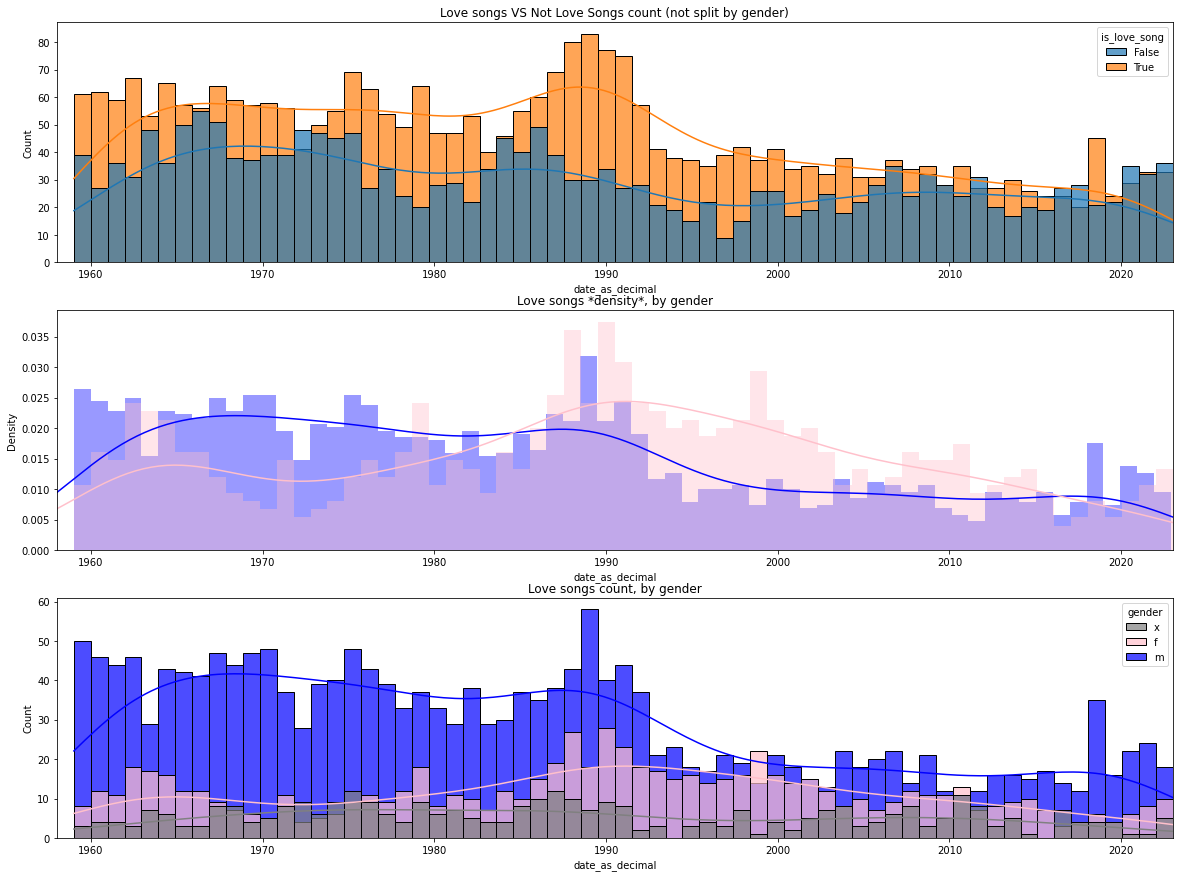

,performer,song,is_love_song,generic_genre,date_as_decimal,gender
0,"""Weird Al"" Yankovic",White & Nerdy,False,ROCK,2006.90080,m
1,'N Sync,(God Must Have Spent) A Little More Time On You,True,POP,1999.09920,m
2,'N Sync,Bye Bye Bye,True,POP,2000.24224,m
3,'N Sync,It's Gonna Be Me,True,POP,2000.51040,m
4,'N Sync,This I Promise You,True,POP,2000.90784,m
...,...,...,...,...,...,...
5011,matchbox twenty,Unwell,False,ROCK,2003.36288,m
5012,twenty one pilots,Heathens,True,ROCK,2016.58016,m
5013,twenty one pilots,Ride,False,ROCK,2016.31200,m
5014,twenty one pilots,Stressed Out,False,ROCK,2015.43712,m


In [9]:
contains_love_df = list_unique_songs_labeled_if_they_contain_the_word_love(gender_df)
contains_love_df
viz_both_charts(contains_love_df)

In [10]:
contains_love_df.head(100)[[IS_LOVE_SONG_COL, 'performer', 'song']]

,is_love_song,performer,song
0,False,"""Weird Al"" Yankovic",White & Nerdy
1,True,'N Sync,(God Must Have Spent) A Little More Time On You
2,True,'N Sync,Bye Bye Bye
3,True,'N Sync,It's Gonna Be Me
4,True,'N Sync,This I Promise You
...,...,...,...
95,True,After 7,Can't Stop
96,True,After 7,Ready Or Not
97,False,After The Fire,Der Kommissar
98,True,Air Supply,All Out Of Love


### To verify how good our "is a love song metric is", let's create a test set that's by hand.

In [13]:
VALIDATION_SET_ROWS = [
    # Clear NO
    [False, 'twenty one pilots', 'Heathens'], 
    [False, '"Weird Al" Yankovic', 'White & Nerdy'],
    [False, 'will.i.am & Britney Spears','Scream & Shout'],
    [False, '100 Proof Aged in Soul', "Somebody's Been Sleeping"], # he can see someone's been cheating on him
    [False, "21 Savage & Metro Boomin", "Runnin"], # gangster rap
    [False, "50 Cent", "Disco Inferno"], # "shake that ass, but your back into it" summarizes this song    
    [False, "6ix9ine Featuring Nicki Minaj & Murda Beatz", "FEFE"], # really just about sexual prowess (and being dangerous, a little)
    
    # Clear YES
    [True,"'N Sync", 'This I Promise You'], # promising to always love someone
    [True, "'N Sync Featuring Nelly", "Girlfriend"], # praising the woman's beauty & life-changing love, asking her to be your girlfriend
    [True, "'N Sync & Gloria Estefan", "Music Of My Heart"], # gratitude for how a lover has opened them up & changed them
    [True, '702',"Get It Together"], # a song about being taken for granted, conflict in romance, wishing it could be fixed  
    
    # Of note, NO
    [False, '2Pac', "Dear Mama/Old School"], # love for his mother, not romantic love
    [False, "24kGoldn Featuring iann dior", "Mood"], # song telling his girlfriend no to be so moody

    # Of note, YES    
    [True, "112", "Peaches & Cream"], # it's a song about sex & being "addicted" to a "tasty" woman
    [True, '10cc', "The Things We Do For Love"], # talks about the hardships of romance, but ultimately says "you make me love you"
    [True, "10cc","I'm Not In Love"], # the title is ironic -- he's actually in love with her (his wife)
    [True, "50 Cent Featuring Nate Dogg", "21 Questions"], # asking his girl if she'd stick with him no matter what
]

### Ok, so it's 13/17, so it does ok. All 4 misses were false positives, which makes sense: you can say "love" but not be a love song (eg "I love oversimplified data analysis")

In [14]:
def test_against_validation_set(df):
    num_wrong = 0
    for is_love_song, performer, song in VALIDATION_SET_ROWS:
        data_val = df.set_index(['performer', 'song']).loc[(performer, song)].is_love_song
        if data_val != is_love_song:
            num_wrong = num_wrong + 1
            print('FAILED: performer: ', performer, 'song:', song, 'SHOULD BE:', is_love_song)
    print(f'{num_wrong} wrong out of {len(VALIDATION_SET_ROWS)} total')

test_against_validation_set(contains_love_df)

FAILED: performer:  twenty one pilots song: Heathens SHOULD BE: False
FAILED: performer:  21 Savage & Metro Boomin song: Runnin SHOULD BE: False
FAILED: performer:  2Pac song: Dear Mama/Old School SHOULD BE: False
FAILED: performer:  24kGoldn Featuring iann dior song: Mood SHOULD BE: False
4 wrong out of 17 total


# Exploring the GPT3 labeled dataset: songs thru 2021 (when GPT3 was last trained) labeled as: "is a love song", "revolves around sex", or "is not a love song"

Given that most people have a sense that love songs are replaced by songs more overty about human sexuality (eg "WAP"), I wanted GPT3 to try to tease that category out.

Note: for the final version, I'll get access to GPT4 API, which from my testing seems to to perform better at teasing out the more subtle nuances of what makes something a love song.

In [15]:
gpt3_df = pd.read_csv('./data/14-OUTPUT-gpt3-love-song-labels-through-2021.csv')
gpt3_df

,performer,song,generic_genre,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal,contains_word_love,gpt3_song_is_love_or_sex_or_no,gpt3_classification_rational
0,"""Weird Al"" Yankovic",White & Nerdy,ROCK,2006-10-14,50.912490,44.870985,74.845,10.0,0.0,m,2006.90080,False,no,parody about nerd culture
1,'N Sync,(God Must Have Spent) A Little More Time On You,POP,1998-12-05,81.288336,39.382591,62.655,0.0,12.0,m,1999.09920,True,love,promising to spend more time and effort on som...
2,'N Sync,Bye Bye Bye,POP,2000-01-29,71.402847,30.184848,64.441,0.0,14.0,m,2000.24224,True,no,"breakup song, not romantic love"
3,'N Sync,It's Gonna Be Me,POP,2000-05-06,68.789522,53.089582,64.860,0.0,0.0,m,2000.51040,True,no,"about desire and anticipation, not romantic love"
4,'N Sync,This I Promise You,POP,2000-09-30,74.214520,30.421922,65.481,0.0,14.0,m,2000.90784,True,love,promising to always love someone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,Patty Smyth With Don Henley,Sometimes Love Just Ain't Enough,UNCATEGORIZED,1992-08-15,58.541992,56.160739,52.857,40.0,8.0,x,1992.82848,True,love,a song about the pain of a failing relationship
4941,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),HIP_HOP,2018-11-03,36.598279,48.039498,93.571,20.0,11.0,m,2018.88544,True,no,a song featured in a superhero film
4942,Prince,I Could Never Take The Place Of Your Man,LATIN,1987-11-14,56.627054,45.082954,45.481,80.0,0.0,m,1988.10784,False,love,a song about the desire for an ex-lover
4943,Queen,Another One Bites The Dust,ROCK,1980-08-16,58.892364,40.185480,34.239,10.0,2.0,m,1980.91296,False,no,a song with funky bass line and catchy lyrics


## Look at general trend over time

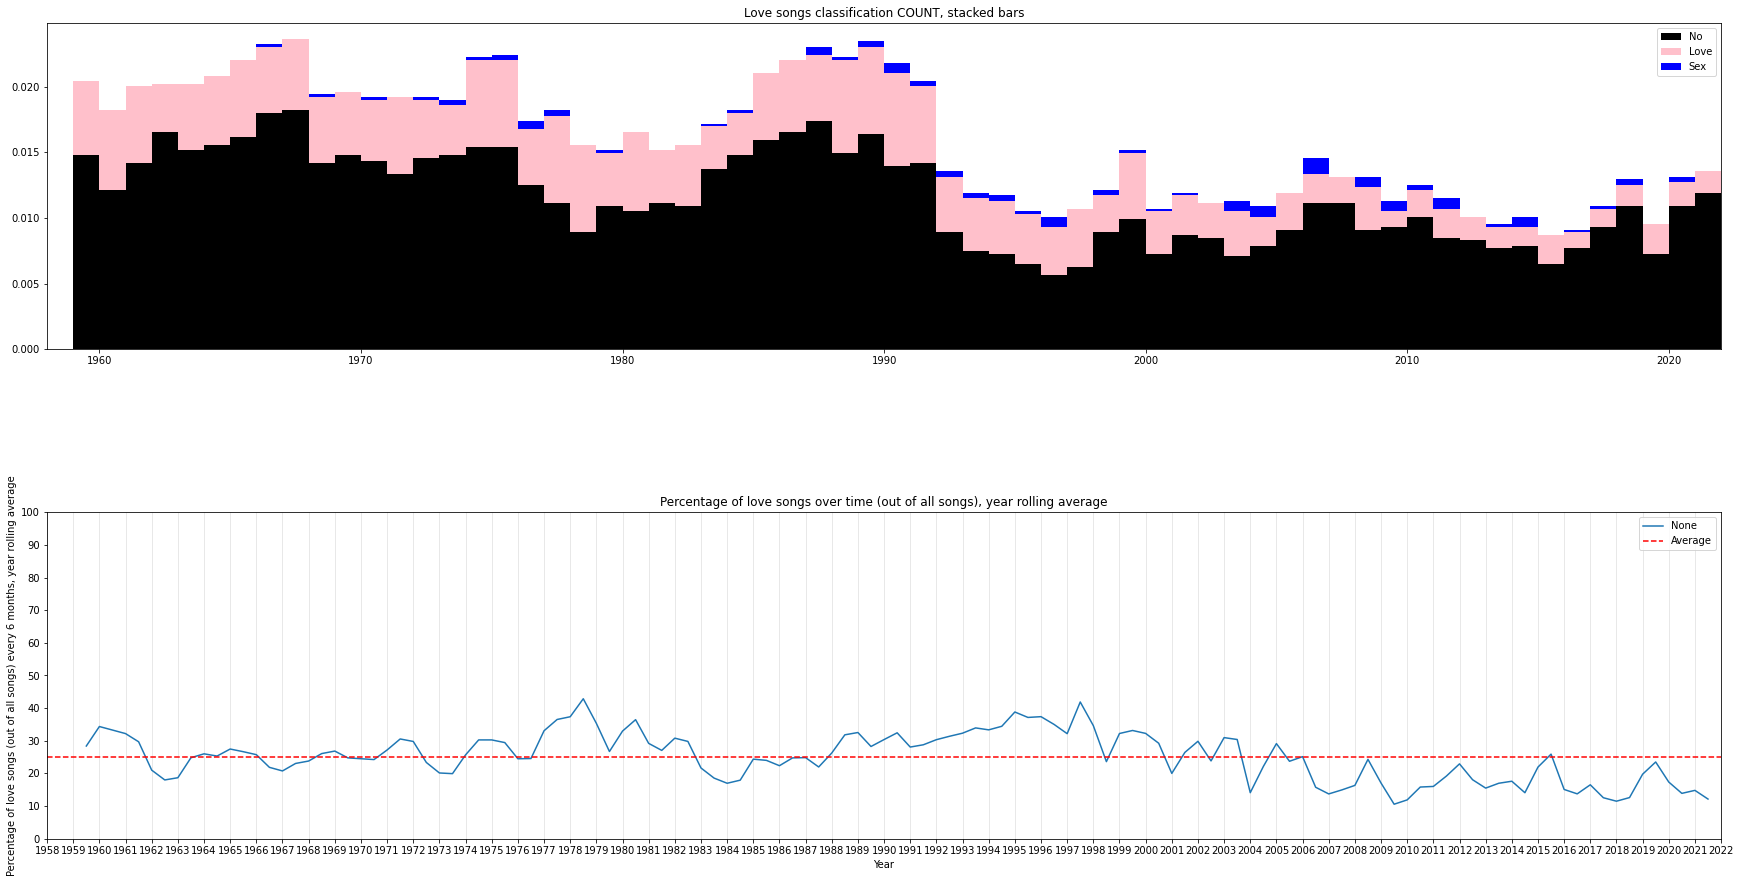

In [176]:
ENTIRE_CHART_BBOX = {"x":[-2.862627270141111,126.29481148663372],"y":[12.152482533476716,85.38013754289815]}
MIN_YEAR = 1958
MAX_YEAR = 2022 # we've excluded the year 2022 cuz GPT wasn't trained on data then
NUM_BINS = (MAX_YEAR - MIN_YEAR) 



# UPDATED STUFF:


def viz_gpt_love_song_absolute_stacked_bars(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]

    love = filtered_to_bbox[filtered_to_bbox.gpt3_song_is_love_or_sex_or_no == 'love']
    sex = filtered_to_bbox[filtered_to_bbox.gpt3_song_is_love_or_sex_or_no == 'sex']
    no = filtered_to_bbox[filtered_to_bbox.gpt3_song_is_love_or_sex_or_no == 'no']

    if subplot:
        plt.subplot(subplot)

    # Define bins edges
    bins_edges = np.linspace(MIN_YEAR, MAX_YEAR, NUM_BINS+1)

    # Create stacked histogram
    plt.hist(
        [no.date_as_decimal, love.date_as_decimal, sex.date_as_decimal], 
        bins=bins_edges, 
        stacked=True, 
        color=['black', 'pink', 'blue'], 
        label=['No', 'Love', 'Sex'], 
        density=True
    )

    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    plt.title('Love songs classification COUNT, stacked bars')
    plt.legend()  # Adds the legend to your plot
    return filtered_to_bbox

def viz_love_song_percentage_over_time(viz_ready, bbox=ENTIRE_CHART_BBOX, subplot=None):
    # Extract year and half-year from date_as_decimal
    viz_ready['year'] = viz_ready['date_as_decimal'].apply(np.floor).astype(int)
    viz_ready['half_year'] = ((viz_ready['date_as_decimal'] - viz_ready['year']) * 2).apply(np.floor).astype(int)

    # Group by year and half-year
    viz_ready['year_half_year'] = viz_ready['year'] + viz_ready['half_year'] / 2

    # Filter only 'love' songs
    love_songs = viz_ready[viz_ready.gpt3_song_is_love_or_sex_or_no == 'love']
    
    # Calculate the count of all songs and 'love' songs in each half-year
    all_songs_per_year_half_year = viz_ready.groupby('year_half_year').size()
    love_songs_per_year_half_year = love_songs.groupby('year_half_year').size()

    # Reindex the series to include all half-years from min to max
    all_half_years = np.arange(viz_ready.year_half_year.min(), viz_ready.year_half_year.max() + 0.5, 0.5)
    all_songs_per_year_half_year = all_songs_per_year_half_year.reindex(all_half_years, fill_value=0)
    love_songs_per_year_half_year = love_songs_per_year_half_year.reindex(all_half_years, fill_value=0)

    # Calculate the percentage of 'love' songs per half-year
    love_percentage_per_year_half_year = (love_songs_per_year_half_year / all_songs_per_year_half_year) * 100

    # Apply a rolling mean to make the curve smoother
    love_percentage_per_year_half_year_smooth = love_percentage_per_year_half_year.rolling(2).mean()

    # Calculate the average percentage of love songs for the entire dataset
    avg_love_songs = love_percentage_per_year_half_year.mean()

    # Subplot optionality
    if subplot:
        plt.subplot(subplot)

    # Set x and y limits
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    plt.ylim([0, 100])  # set y-axis limits to be between 0 and 100

    # Set x-axis ticks for every year
    plt.xticks(np.arange(MIN_YEAR, MAX_YEAR+1, 1.0))
    plt.yticks(np.arange(0, 101, 10))

    # Rotate x-axis labels by 90 degrees
    plt.setp(plt.gca().get_xticklabels(), rotation=90)

    # Plot the line chart
    love_percentage_per_year_half_year_smooth.plot(kind='line', title='Percentage of love songs over time (out of all songs), year rolling average')
    
    # Add a line for the average percentage of love songs
    plt.axhline(y=avg_love_songs, color='r', linestyle='--', label='Average')
    plt.legend()

    plt.xlabel('Year')
    plt.ylabel('Percentage of love songs (out of all songs) every 6 months, year rolling average')

    # Add vertical gridlines for each year
    plt.grid(axis='x', color='lightgray', linestyle='-', linewidth=0.5)
    
    return love_percentage_per_year_half_year_smooth







def viz_gpt_love_song_labeled_charts(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term=''):
    plt.figure(figsize=(30,15))   
    viz_gpt_love_song_absolute_stacked_bars(viz_ready, bbox, filter_term, 211)
    viz_love_song_percentage_over_time(viz_ready, filter_term, 212)
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots
    plt.show()
    return viz_ready[['performer', 'song', 'contains_word_love', 'generic_genre', 'gpt3_song_is_love_or_sex_or_no', 'gpt3_classification_rational', 'date_as_decimal', 'gender']]

shhhh = viz_gpt_love_song_labeled_charts(gpt3_df)

## MEN VS WOMEN:

### For men: love songs nose dive sharply in 2002, but the sharpest (and most final) drop happens in 2009. You might say, "In 2009, the male love song, which was already in decline, fell out of fashion for good."

#### Men sing fewer love songs on average (22%), compared to all genders combined (25%), and to women (31%)

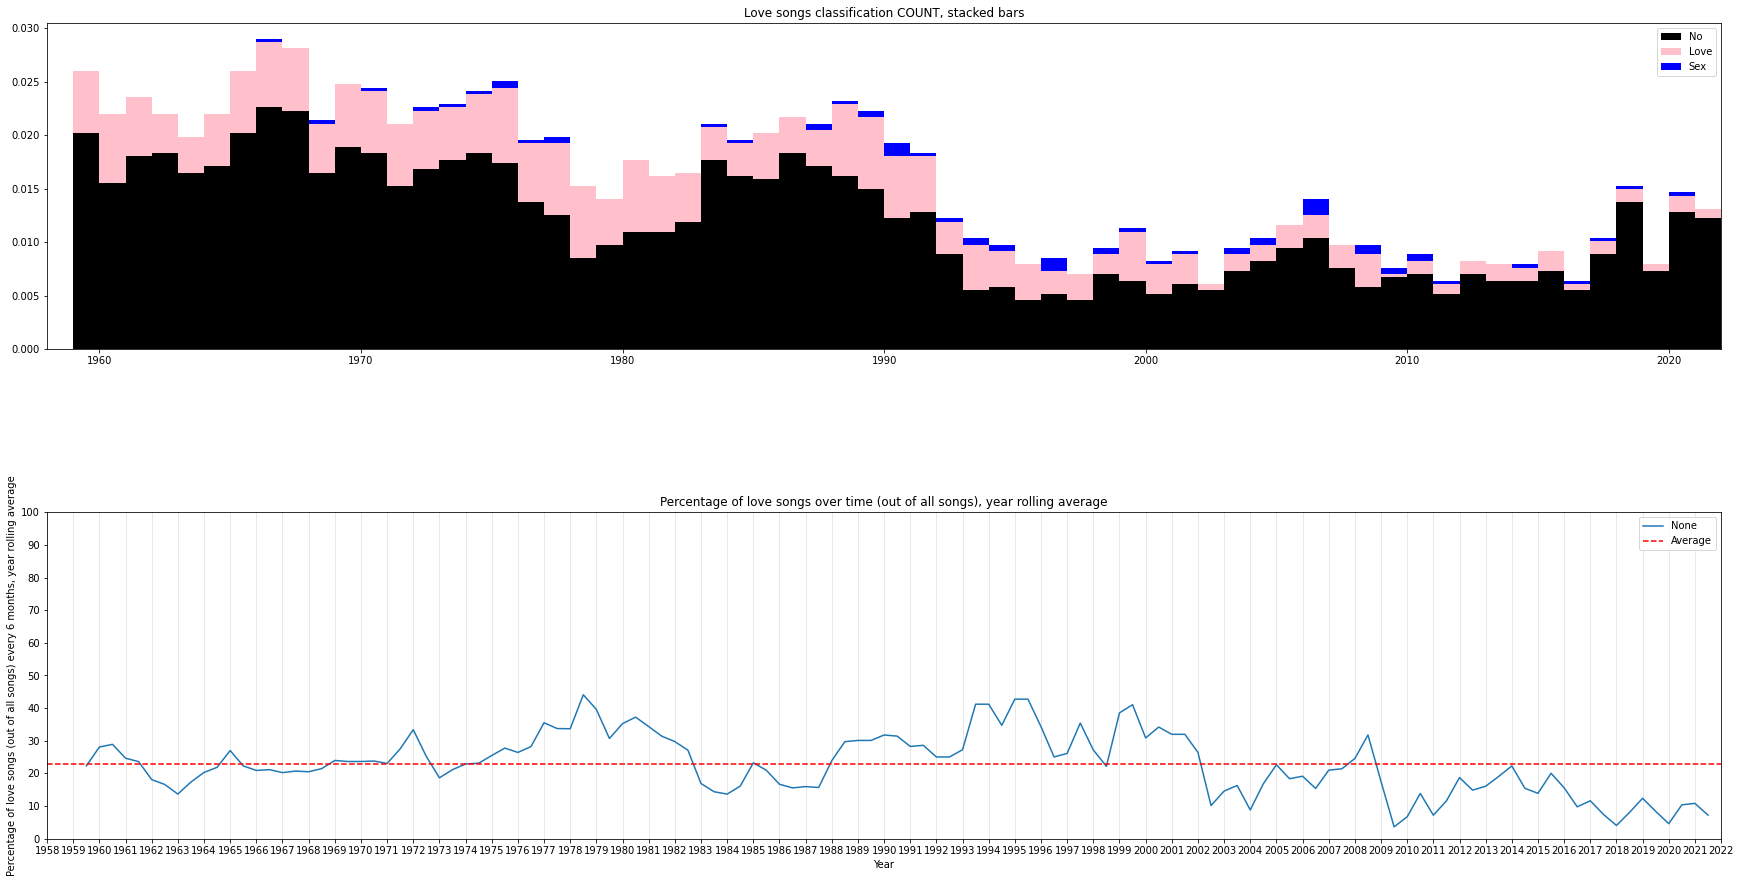

In [177]:
just_men_df = gpt3_df[gpt3_df.gender == 'm'].copy()
shhhh = viz_gpt_love_song_labeled_charts(just_men_df)

### For women: Love songs make up a high percentage of songs women sing (especially in the early 60s). Love songs died down from 2007-2015, before surging again.

#### Women sing WAY MORE love songs on average (31%), compared to all genders combined (25%), or men (22%)

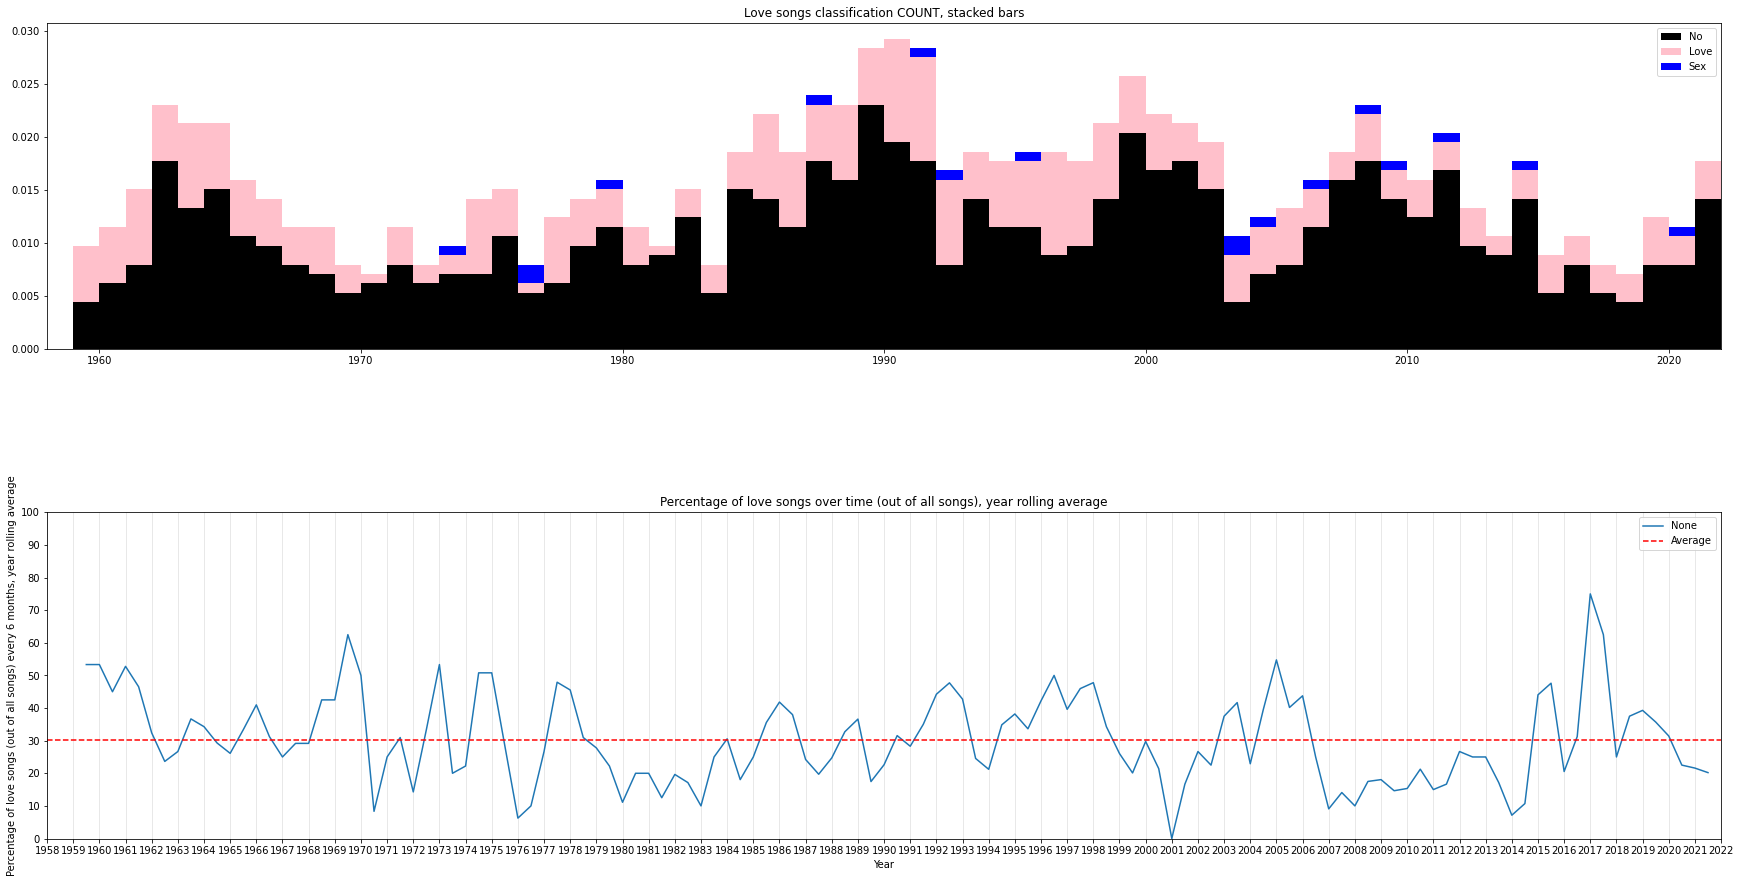

In [178]:
just_women_df = gpt3_df[gpt3_df.gender == 'f'].copy()
shhhh = viz_gpt_love_song_labeled_charts(just_women_df)

## GENRE

In [179]:
gpt3_df.generic_genre.value_counts()

POP                1847
ROCK               1077
UNCATEGORIZED       538
JAZZ_INFLUENCED     535
HIP_HOP             390
ELECTRO             256
COUNTRY             133
FUNK                 78
LATIN                40
FOLK                 40
REGGAE               11
Name: generic_genre, dtype: int64

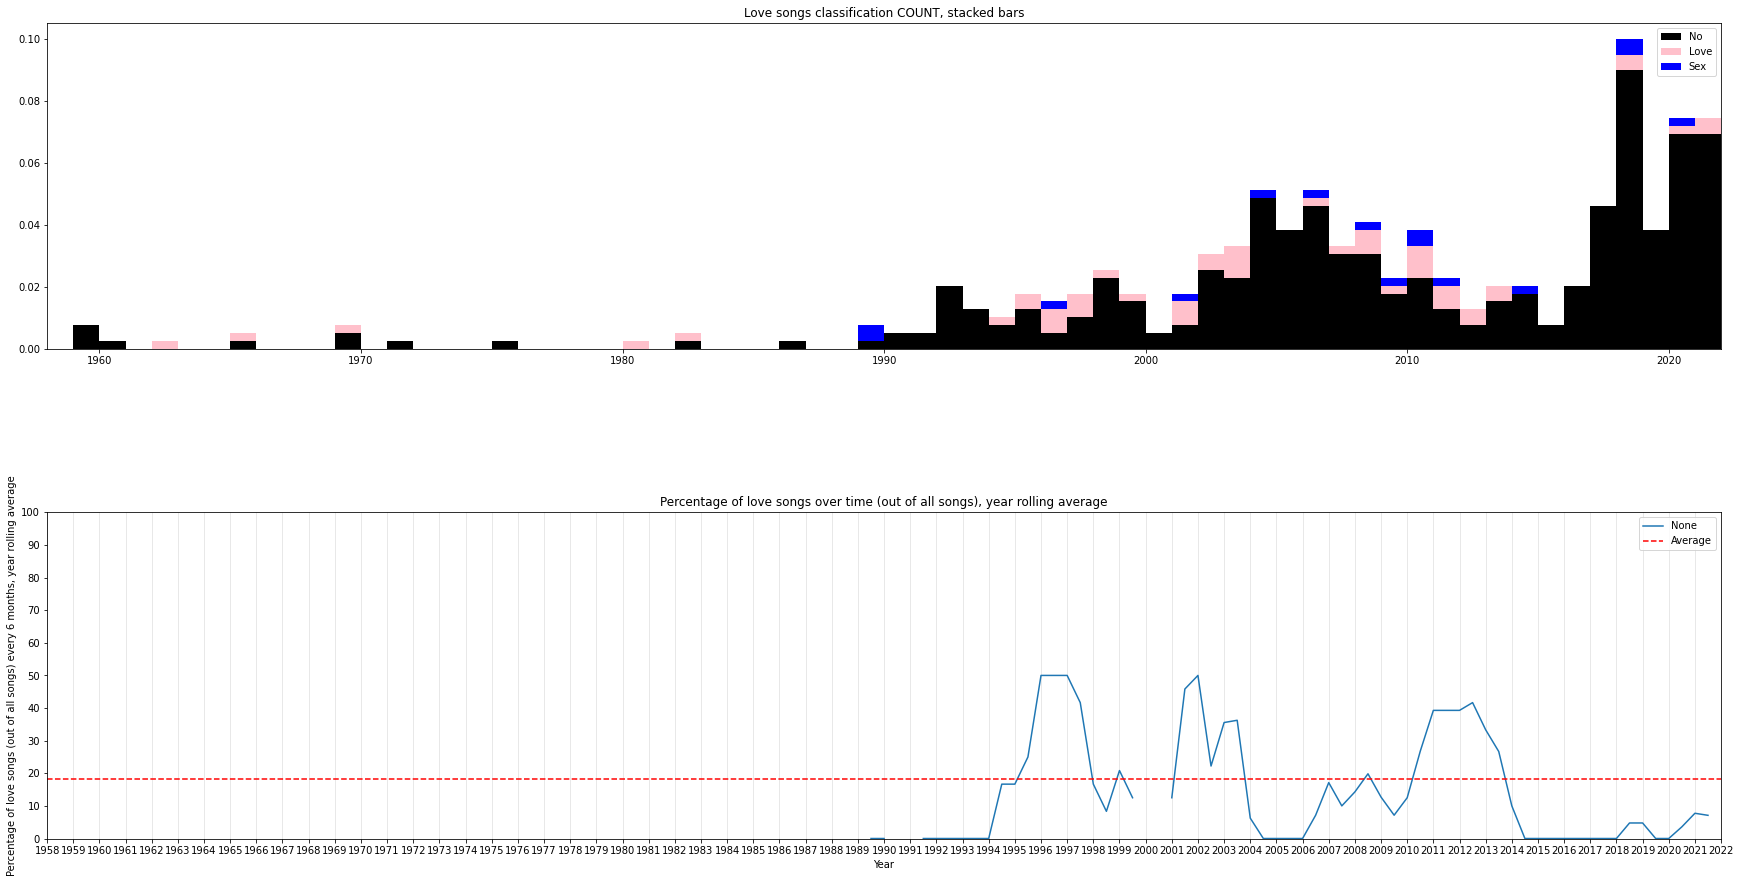

In [180]:
just_hip_hop_df = gpt3_df[gpt3_df.generic_genre == 'HIP_HOP'].copy()
shhhh = viz_gpt_love_song_labeled_charts(just_hip_hop_df)

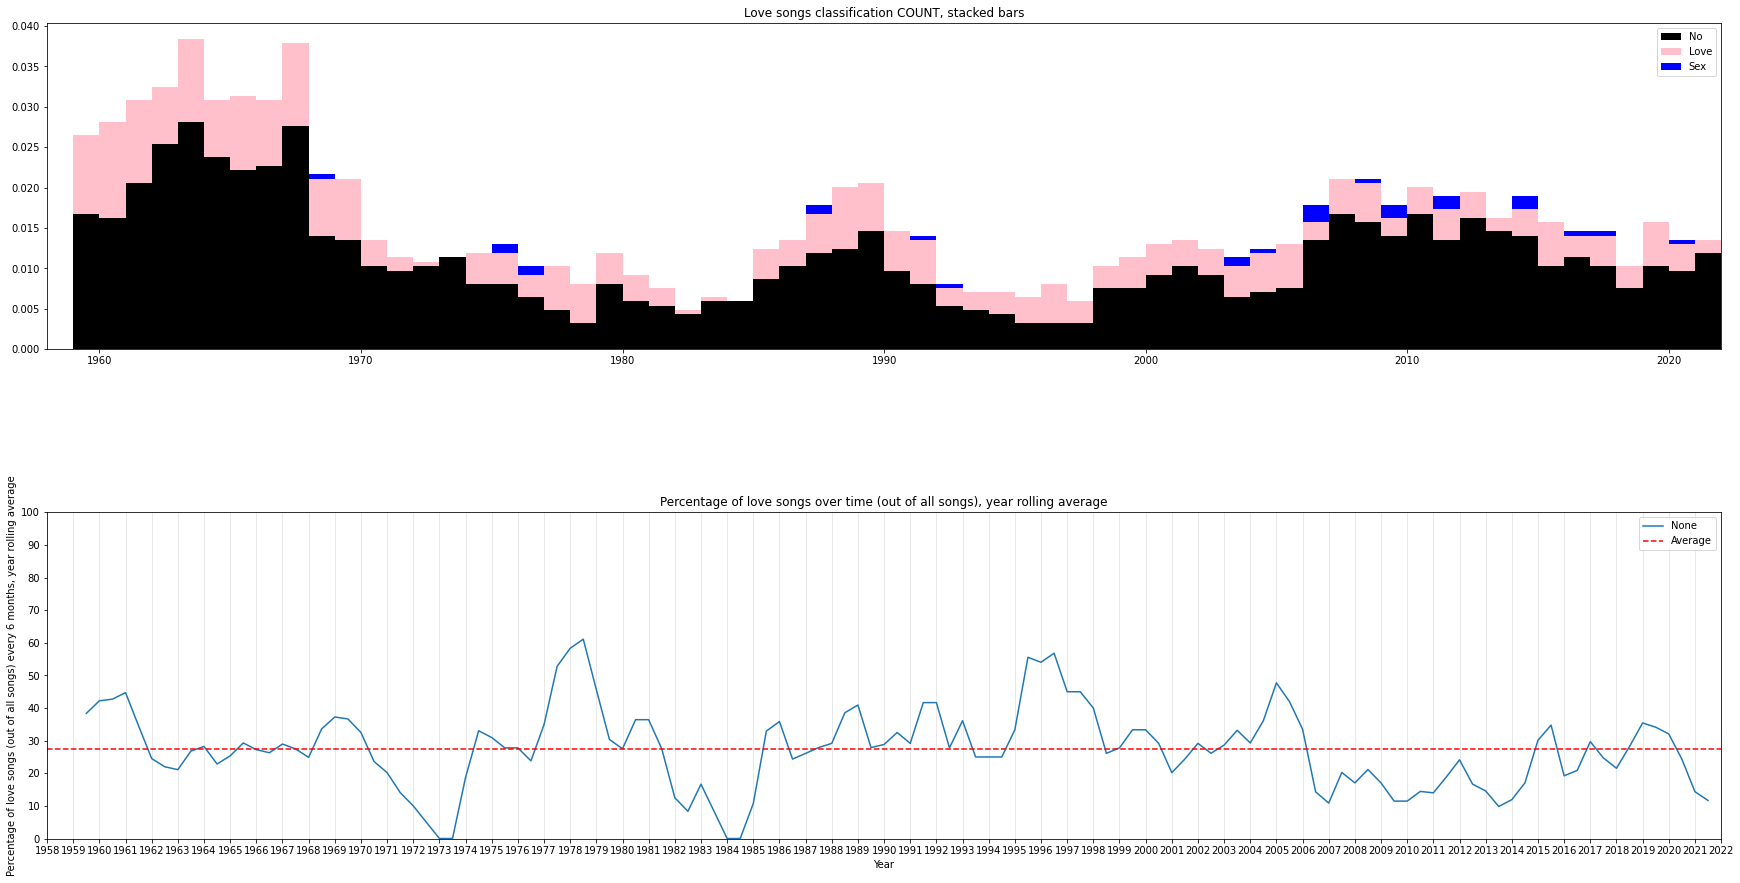

In [181]:
just_pop_df = gpt3_df[gpt3_df.generic_genre == 'POP'].copy()
shhhh = viz_gpt_love_song_labeled_charts(just_pop_df)

## ARTISTS

#### Because performer is often featuring other artists, pull the primary one, otherwise artists who collaborate a lot will not get grouped into a total count for them.

In [182]:
import re
def split_on_featuring(s):
    parts = re.split('(?i)featuring', s)
    if parts:
        return parts[0].strip()
    return s
def split_on_with(s):
    parts = re.split('(?i)with', s)
    if parts:
        return parts[0].strip()
    return s

gpt3_df['primary_performer'] = gpt3_df['performer'].apply(split_on_featuring).apply(split_on_with)

In [183]:
split_on_with('Elvis With Eleanor')

'Elvis'

In [184]:
gpt3_df.primary_performer#.str.contains('Beyonce').sum()

0          "Weird Al" Yankovic
1                      'N Sync
2                      'N Sync
3                      'N Sync
4                      'N Sync
                 ...          
4940               Patty Smyth
4941    Post Malone & Swae Lee
4942                    Prince
4943                     Queen
4944                The O'Jays
Name: primary_performer, Length: 4945, dtype: object

### Looking at the top artists:

In [191]:
# Get count of each song type for each performer
song_counts = pd.crosstab(
    gpt3_df['primary_performer'], 
    gpt3_df['gpt3_song_is_love_or_sex_or_no']
)

# Get total song count for each performer
total_song_counts = gpt3_df['primary_performer'].value_counts()

# Combine these into one dataframe
agg_df = pd.concat([total_song_counts, song_counts], axis=1)

# Fill NaNs with 0 (these occur where a performer has no songs of a given type)
agg_df = agg_df.fillna(0)

# Calculate percentages of total for each song type
agg_df['love_pct'] = round(agg_df['love'] / agg_df['primary_performer'] * 100)
agg_df['sex_pct'] = round(agg_df['sex'] / agg_df['primary_performer'] * 100)
agg_df['no_pct'] = round(agg_df['no'] / agg_df['primary_performer'] * 100)

# Calculate most common gender for each performer
most_common_gender = gpt3_df.groupby('primary_performer')['gender'].agg(lambda x:x.value_counts().index[0])

# Join most common gender to agg_df
agg_df = agg_df.join(most_common_gender)

# Create color dictionary and map gender to color
gender_colors = {"f": "pink", "m": "blue", "x": "gray"}
agg_df['color'] = agg_df['gender'].map(gender_colors)

# Select top 50 artists by total song count
top_artists_df = agg_df.nlargest(50, 'primary_performer')
top_artists_df

,primary_performer,love,no,sex,love_pct,sex_pct,no_pct,gender,color
Madonna,38,5,32,1,13.0,3.0,84.0,f,pink
Drake,37,6,31,0,16.0,0.0,84.0,m,blue
The Beatles,34,12,22,0,35.0,0.0,65.0,m,blue
Taylor Swift,29,18,11,0,62.0,0.0,38.0,f,pink
Elvis Presley,25,4,21,0,16.0,0.0,84.0,m,blue
Mariah Carey,25,12,12,1,48.0,4.0,48.0,f,pink
Stevie Wonder,25,4,21,0,16.0,0.0,84.0,m,blue
Michael Jackson,25,5,20,0,20.0,0.0,80.0,m,blue
The Rolling Stones,23,5,18,0,22.0,0.0,78.0,m,blue
Elton John,23,9,14,0,39.0,0.0,61.0,m,blue


### Relative percentages of song type (from most to least popular artist)

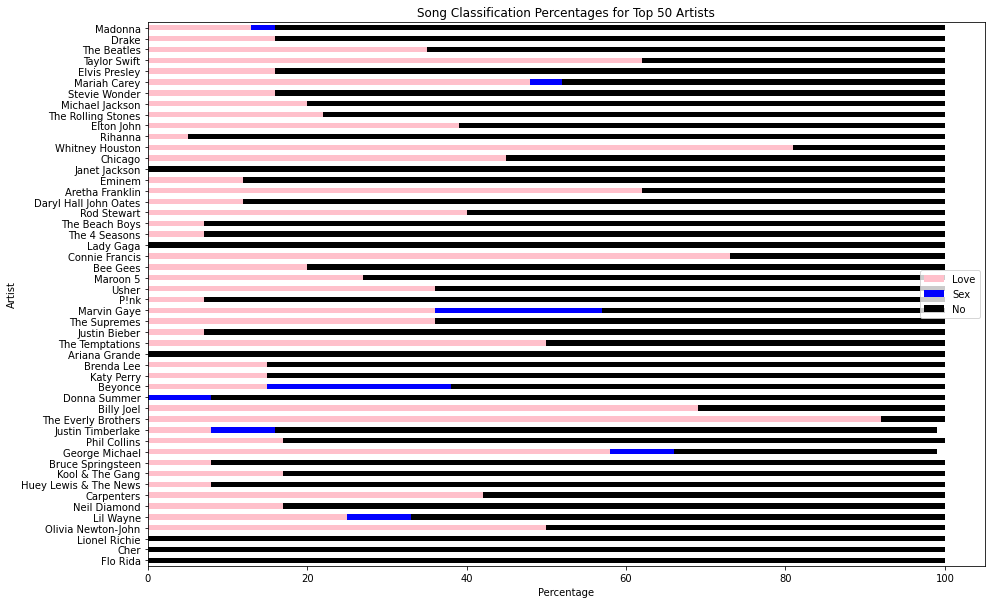

In [186]:
top_artists_df[['love_pct', 'sex_pct', 'no_pct']].plot(
    kind='barh',
    stacked=True,
    figsize=(15,10),
    color=["pink", "blue", "black"]  # Assigning the colors here
)
plt.legend(['Love', 'Sex', 'No'])
plt.title('Song Classification Percentages for Top 50 Artists')
plt.xlabel('Percentage')
plt.ylabel('Artist')
plt.gca().invert_yaxis() # This is to maintain the top artist at the top after sorting
plt.show()


### ... sorted from oldest to newest artists (based on the average of all their song release dates)

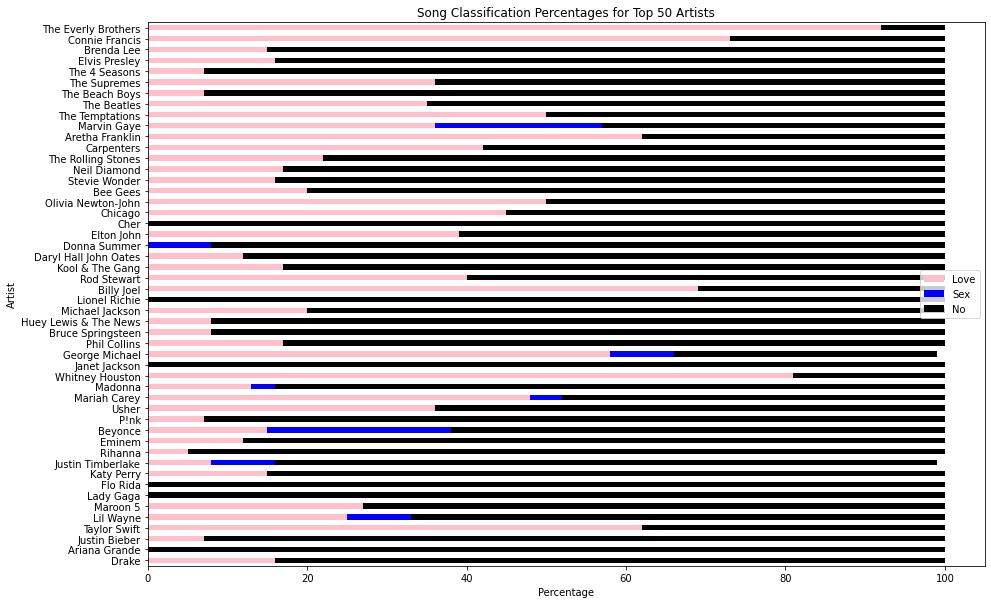

In [187]:
# Calculate average release date for each artist
avg_release_dates = gpt3_df.groupby('primary_performer')['date_as_decimal'].mean()

# Add this data to our DataFrame
top_artists_df['avg_release_date'] = top_artists_df.index.map(avg_release_dates)

# Sort by average release date
top_artists_df.sort_values('avg_release_date', inplace=True)

# Plot horizontal stacked bar chart with defined colors
top_artists_df[['love_pct', 'sex_pct', 'no_pct']].plot(
    kind='barh',
    stacked=True,
    figsize=(15,10),
    color=["pink", "blue", "black"]  # Assigning the colors here
)
plt.legend(['Love', 'Sex', 'No'])
plt.title('Song Classification Percentages for Top 50 Artists')
plt.xlabel('Percentage')
plt.ylabel('Artist')
plt.gca().invert_yaxis()  # This is to maintain the earliest artist at the top after sorting
plt.show()


### ... the most "love-y dove-y" atists:

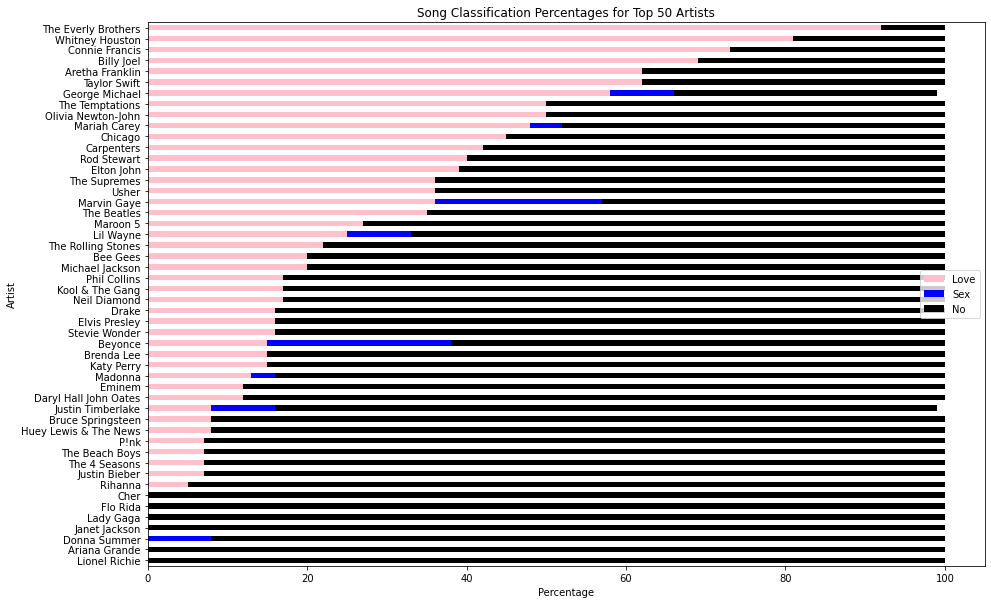

In [188]:
top_artists_df[['love_pct', 'sex_pct', 'no_pct']].sort_values(by='love_pct', ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(15,10),
    color=["pink", "blue", "black"]  # Assigning the colors here
)
plt.legend(['Love', 'Sex', 'No'])
plt.title('Song Classification Percentages for Top 50 Artists')
plt.xlabel('Percentage')
plt.ylabel('Artist')
plt.gca().invert_yaxis() # This is to maintain the top artist at the top after sorting
plt.show()


### ... the "sexiest" artists

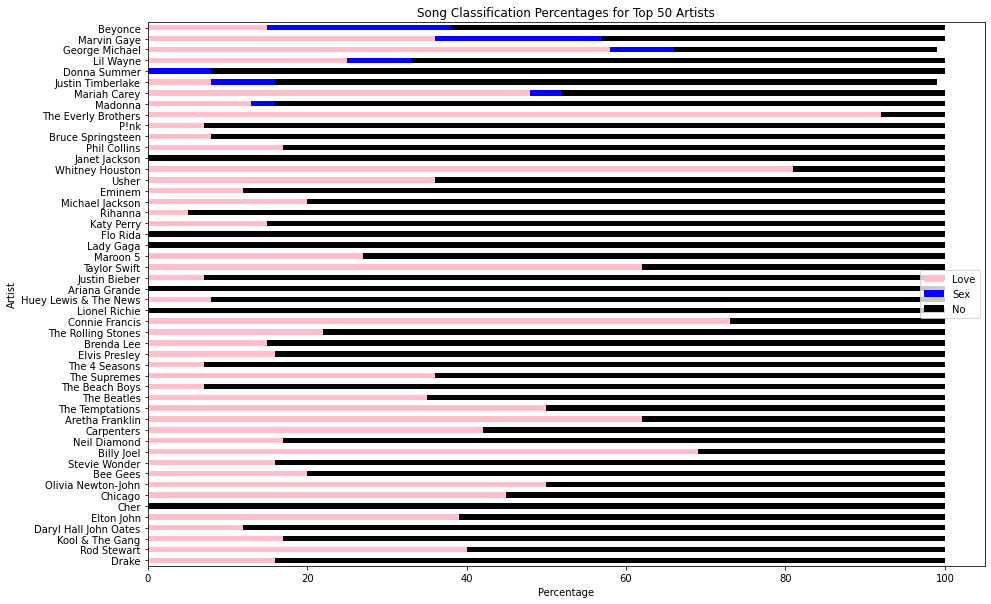

In [189]:
top_artists_df[['love_pct', 'sex_pct', 'no_pct']].sort_values(by='sex_pct', ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(15,10),
    color=["pink", "blue", "black"]  # Assigning the colors here
)
plt.legend(['Love', 'Sex', 'No'])
plt.title('Song Classification Percentages for Top 50 Artists')
plt.xlabel('Percentage')
plt.ylabel('Artist')
plt.gca().invert_yaxis() # This is to maintain the top artist at the top after sorting
plt.show()

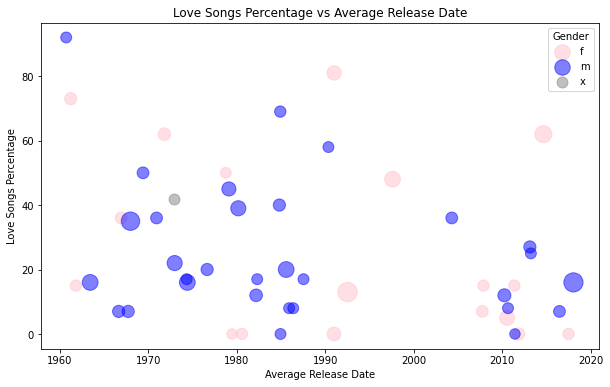

In [193]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Calculate average release date for each artist
avg_release_dates = gpt3_df.groupby('primary_performer')['date_as_decimal'].mean()

# Add this data to our DataFrame
top_artists_df['avg_release_date'] = top_artists_df.index.map(avg_release_dates)

# Sort by average release date
top_artists_df.sort_values('avg_release_date', inplace=True)

# Plot for each gender
for gender, color in gender_colors.items():
    # Filter the data for the current gender
    df = top_artists_df[top_artists_df['color'] == color]
    
    # Plot the data for the current gender
    plt.scatter(
        df['avg_release_date'], 
        df['love_pct'], 
        s=df['primary_performer']*10,
        c=color,
        alpha=0.5,
        label=gender)  # Add a label for the legend

# Set title and labels
plt.title('Love Songs Percentage vs Average Release Date')
plt.xlabel('Average Release Date')
plt.ylabel('Love Songs Percentage')

# Add a legend
plt.legend(title='Gender', loc='upper right')

# Display the plot
plt.show()

In [214]:
top_artists_df

,primary_performer,love,no,sex,love_pct,sex_pct,no_pct,gender,color,avg_release_date
The Everly Brothers,12,11,1,0,92.0,0.0,8.0,m,blue,1960.710987
Connie Francis,15,11,4,0,73.0,0.0,27.0,f,pink,1961.222763
Brenda Lee,13,2,11,0,15.0,0.0,85.0,f,pink,1961.801772
Elvis Presley,25,4,21,0,16.0,0.0,84.0,m,blue,1963.421555
The 4 Seasons,15,1,14,0,7.0,0.0,93.0,m,blue,1966.642923
The Supremes,14,5,9,0,36.0,0.0,64.0,f,pink,1966.916937
The Beach Boys,15,1,14,0,7.0,0.0,93.0,m,blue,1967.718251
The Beatles,34,12,22,0,35.0,0.0,65.0,m,blue,1967.982664
The Temptations,14,7,7,0,50.0,0.0,50.0,m,blue,1969.397897
Marvin Gaye,14,5,6,3,36.0,21.0,43.0,m,blue,1970.926857


## Let's look at small multiples of all the artists (a "ridge plot"), little "signatures" of their song types and distrutions

In [238]:
def viz_gpt_love_song_absolute_stacked_bars_FOR_SMALL_MULTIPLES(viz_ready, ax, performer_name, bbox=ENTIRE_CHART_BBOX, filter_term=''):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]

    love = filtered_to_bbox[filtered_to_bbox.gpt3_song_is_love_or_sex_or_no == 'love']
    sex = filtered_to_bbox[filtered_to_bbox.gpt3_song_is_love_or_sex_or_no == 'sex']
    no = filtered_to_bbox[filtered_to_bbox.gpt3_song_is_love_or_sex_or_no == 'no']

    # Define bins edges
    bins_edges = np.linspace(MIN_YEAR, MAX_YEAR, NUM_BINS+1)

    # Create stacked histogram
    ax.hist(
        [no.date_as_decimal, love.date_as_decimal, sex.date_as_decimal], 
        bins=bins_edges, 
        stacked=True, 
        color=['black', 'pink', 'blue'], 
        density=True
    )

    ax.set_xlim([MIN_YEAR, MAX_YEAR])
    ax.set_yticks([])  # Remove y-axis ticks
    ax.spines['left'].set_visible(False)  # Remove left spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.spines['top'].set_visible(False)  # Remove top spine

    # Set the y-label to be the performer's name at left side
    ax.text(-0.1, 0.5, performer_name, va='center', ha='right', rotation='horizontal', transform=ax.transAxes, fontsize=16, fontweight='bold')
    # Set the y-label to be the performer's name at right side
    ax.text(1.05, 0.5, performer_name, va='center', ha='left', rotation='horizontal', transform=ax.transAxes, fontsize=16, fontweight='bold')

    return filtered_to_bbox


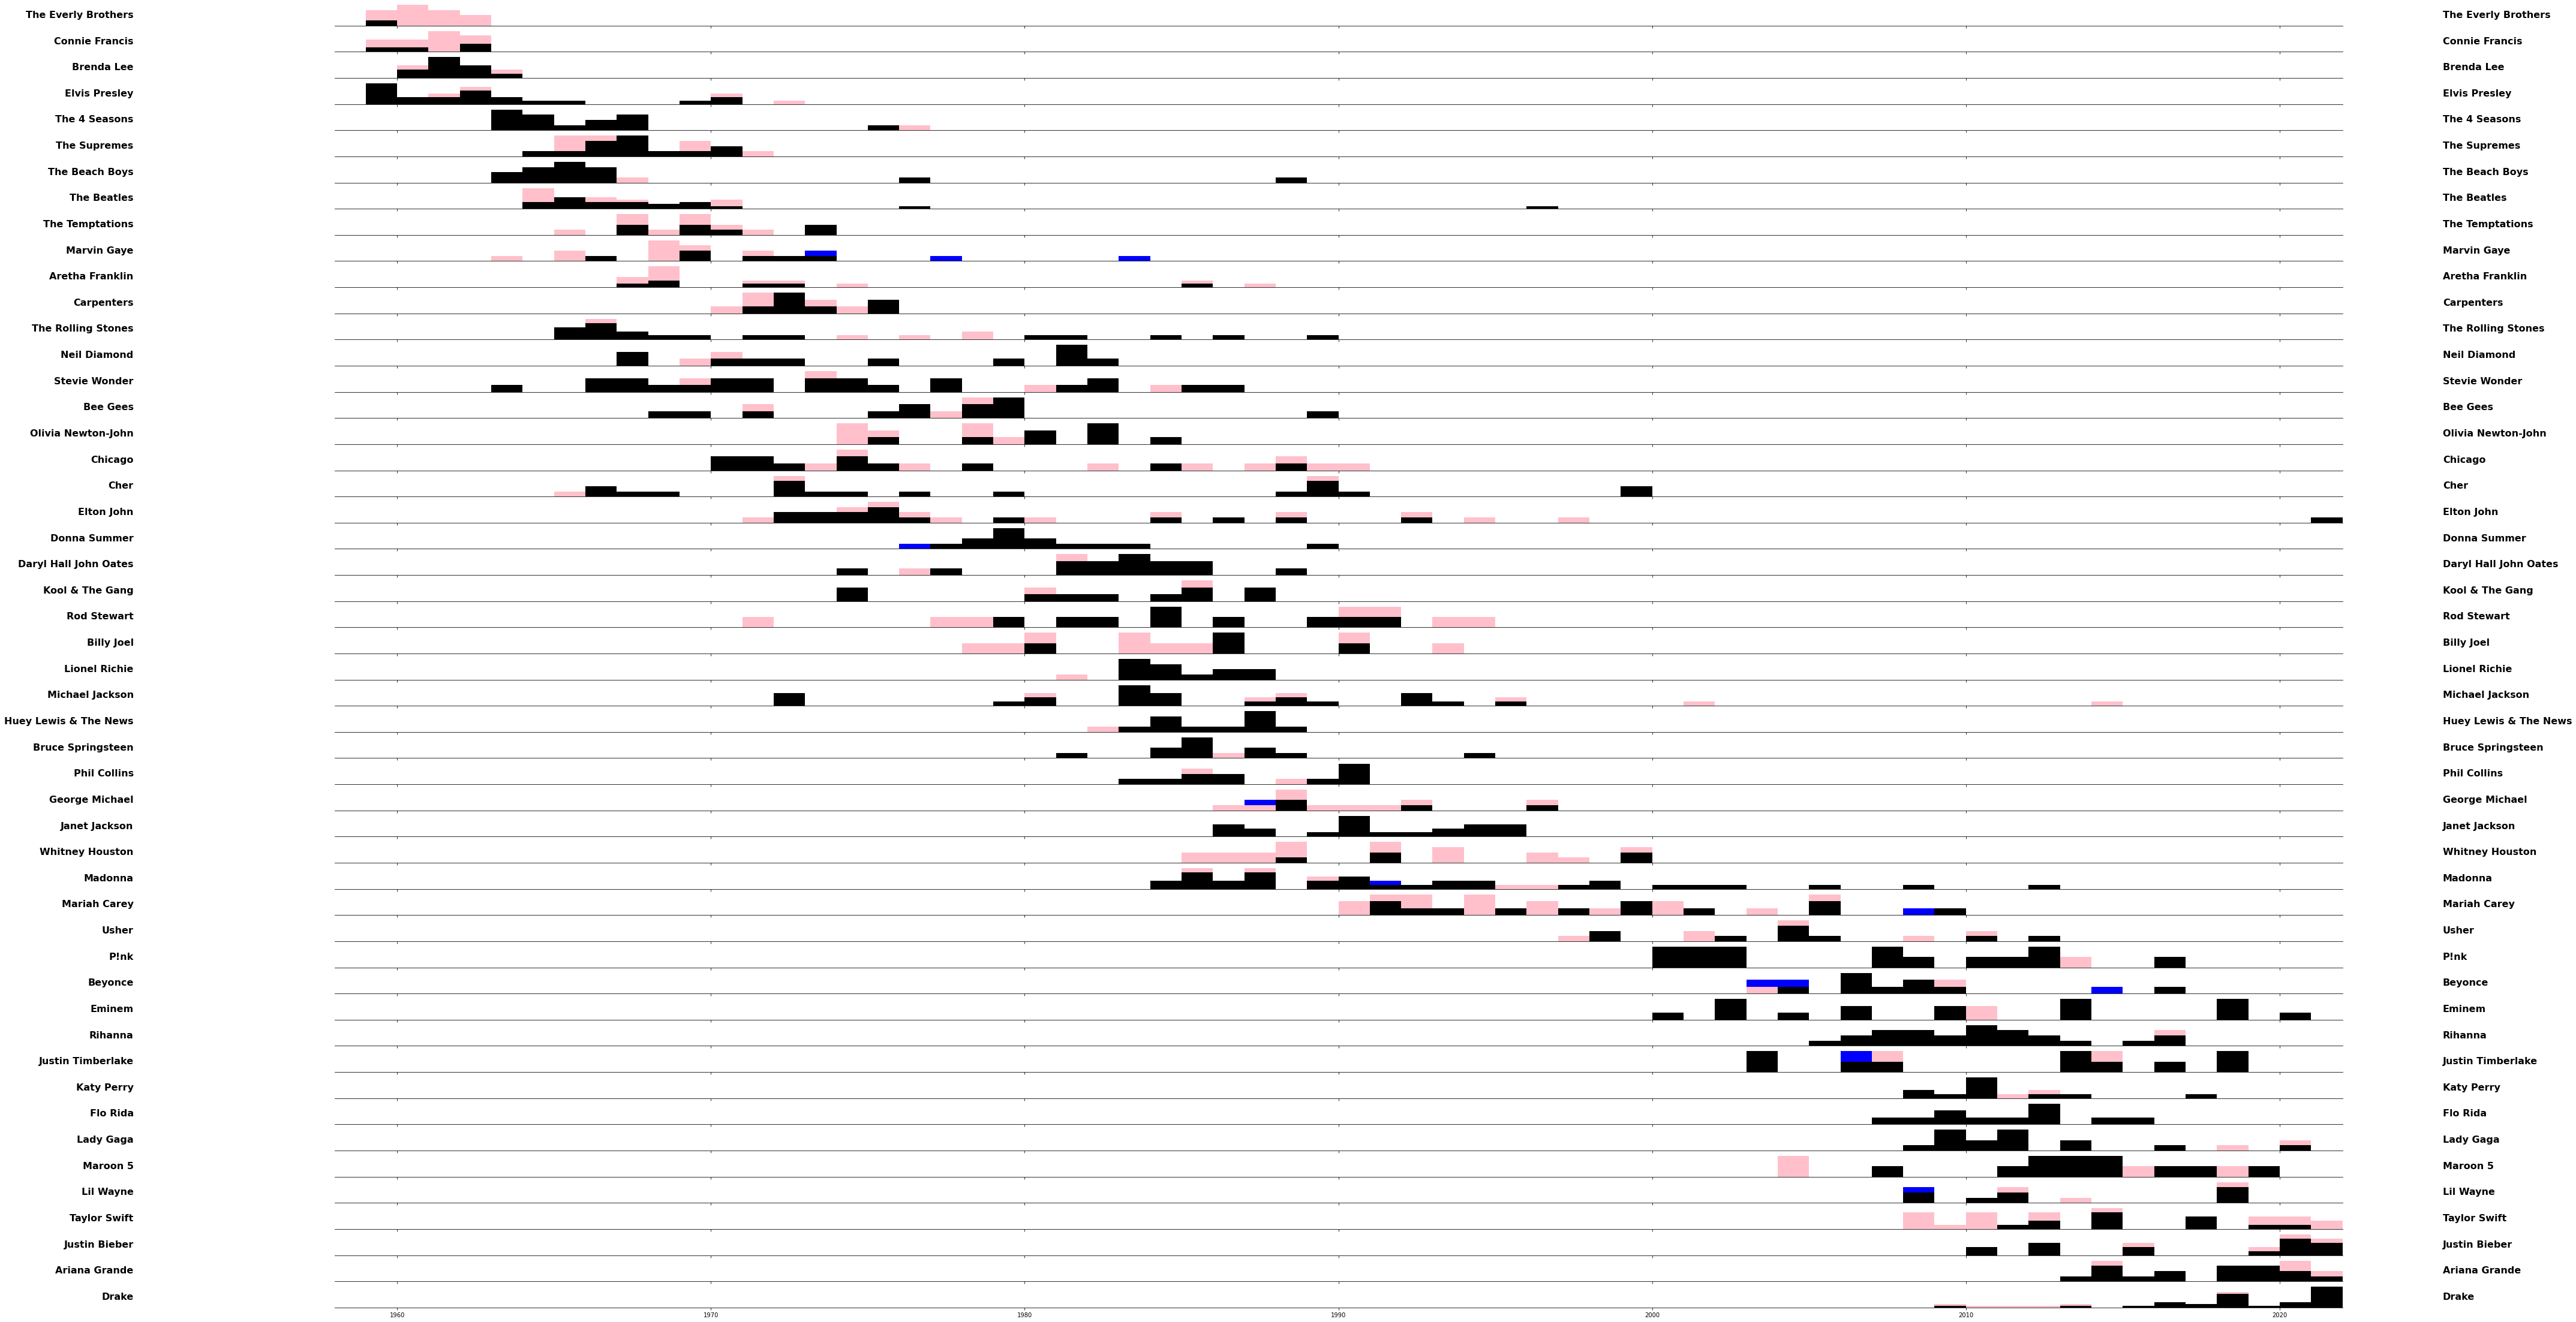

In [239]:
num_artists = len(top_artists_df)
fig, axs = plt.subplots(num_artists, figsize=(60,40))

for idx, top_artist in enumerate(top_artists_df.index):
    filtered_to_just_the_top_artist = gpt3_df[gpt3_df.primary_performer.str.contains(top_artist)]
    viz_gpt_love_song_absolute_stacked_bars_FOR_SMALL_MULTIPLES(filtered_to_just_the_top_artist, axs[idx], top_artist)

# plt.tight_layout()  # ensures adequate spacing between subplots
plt.show()


## Looking at individual artists:

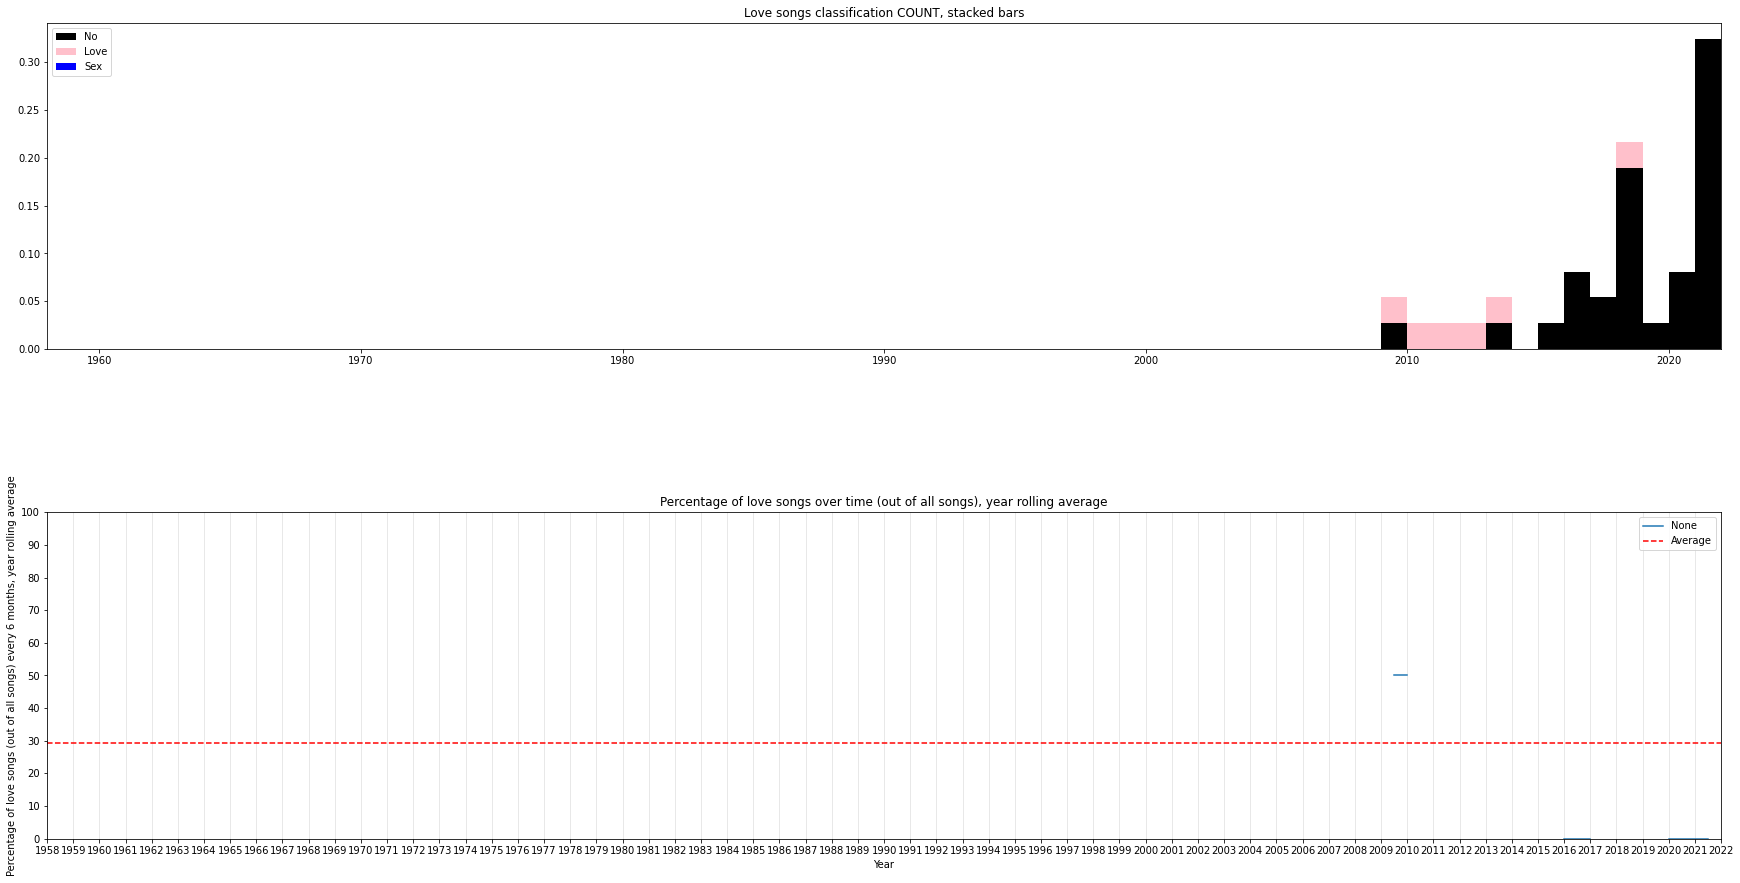

,performer,song,contains_word_love,generic_genre,gpt3_song_is_love_or_sex_or_no,gpt3_classification_rational,date_as_decimal,gender
1297,Drake,Best I Ever Had,True,HIP_HOP,love,a song about a past relationship and longing f...,2009.49472,m
1298,Drake,Champagne Poetry,True,HIP_HOP,no,unknown song,2021.73792,m
1299,Drake,Diplomatic Immunity,True,HIP_HOP,no,unknown song,2018.14048,m
1300,Drake,Emotionless,True,HIP_HOP,no,a song expressing emotional detachment and ins...,2018.57760,m
1301,Drake,Fake Love,True,HIP_HOP,no,a song about relationships and trust issues,2016.92768,m
1302,Drake,Find Your Love,True,HIP_HOP,love,a song about finding love and pursuing a roman...,2010.48800,m
1303,Drake,God's Plan,True,HIP_HOP,no,a song about Drake's philanthropy,2018.14048,m
1304,Drake,Hotline Bling,True,HIP_HOP,no,a song about late-night phone conversations an...,2015.70528,m
1305,Drake,I'm Upset,True,HIP_HOP,no,a song expressing dissatisfaction and frustration,2018.48800,m
1306,Drake,In My Feelings,True,HIP_HOP,love,a song about intense emotions and romantic nos...,2018.57760,m


In [241]:
viz_gpt_love_song_labeled_charts(
    gpt3_df[gpt3_df.performer.str.startswith('Drake')].copy()
)

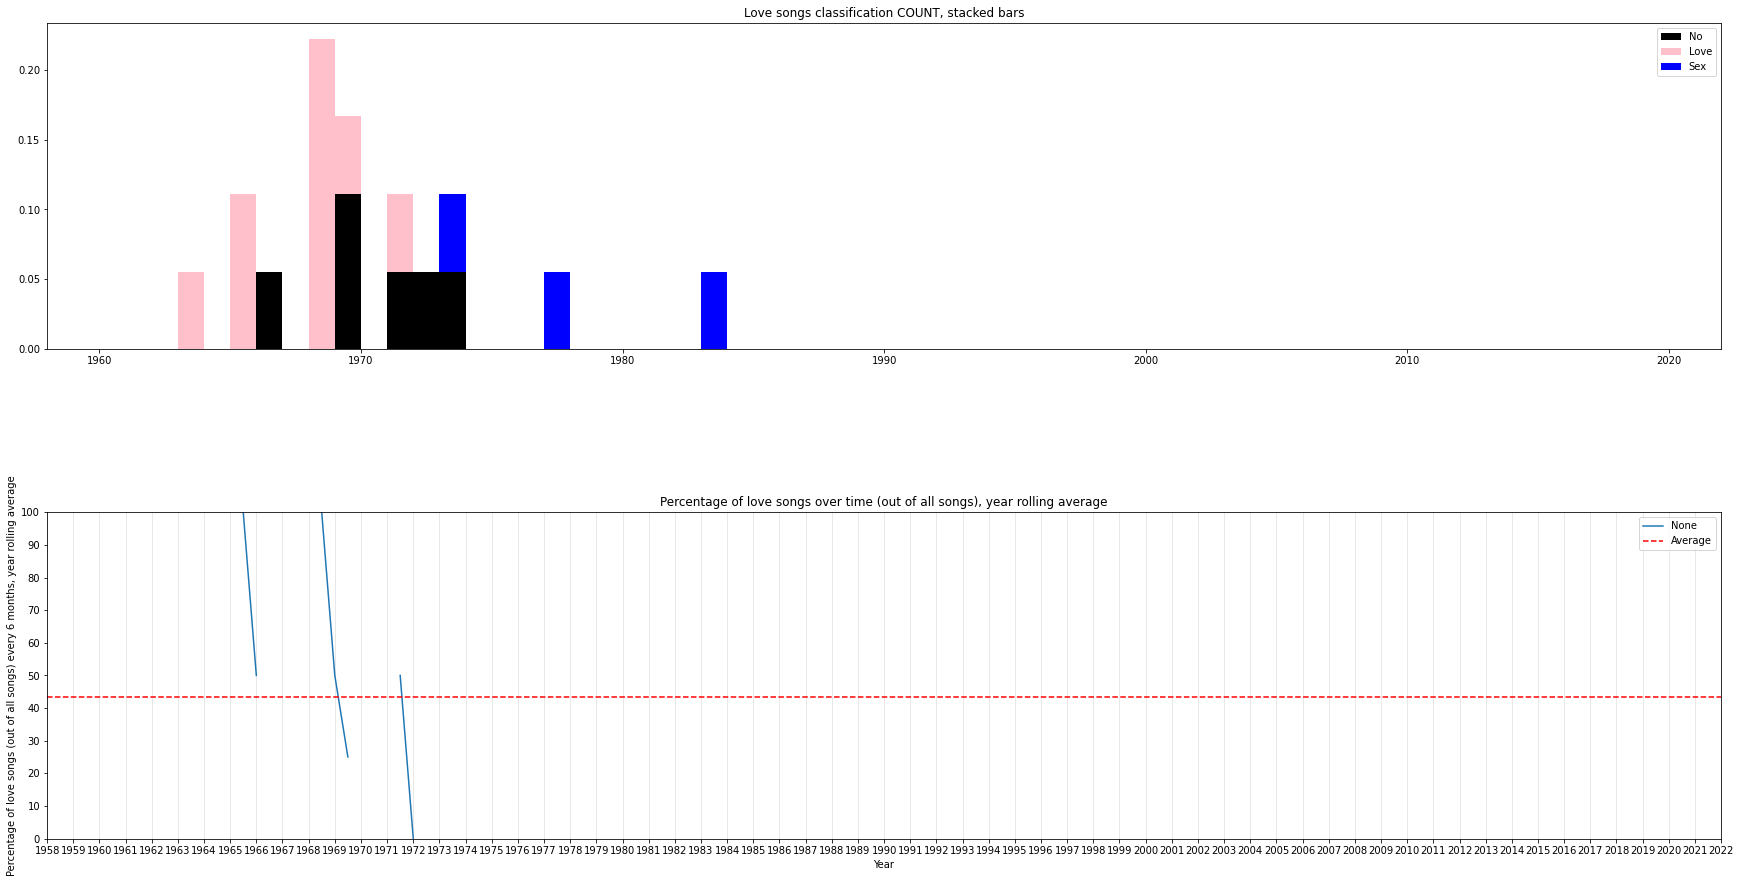

,performer,song,contains_word_love,generic_genre,gpt3_song_is_love_or_sex_or_no,gpt3_classification_rational,date_as_decimal,gender
2753,Marvin Gaye,Ain't That Peculiar,True,JAZZ_INFLUENCED,no,describes attraction and flirtation with sexua...,1966.14560,m
2754,Marvin Gaye,Got To Give It Up (Pt. I),True,JAZZ_INFLUENCED,sex,describes sexual behavior and encounters,1977.59392,m
2755,Marvin Gaye,How Sweet It Is To Be Loved By You,True,JAZZ_INFLUENCED,love,expressing happiness and gratitude for being l...,1965.27072,m
2756,Marvin Gaye,I Heard It Through The Grapevine,True,JAZZ_INFLUENCED,no,narrates suspicion and heartbreak related to i...,1969.25600,m
2757,Marvin Gaye,I'll Be Doggone,True,JAZZ_INFLUENCED,love,expresses love and commitment to a romantic pa...,1965.59904,m
2758,Marvin Gaye,Inner City Blues (Make Me Wanna Holler),False,JAZZ_INFLUENCED,no,social commentary and critique of urban life,1972.10784,m
2759,Marvin Gaye,Let's Get It On,True,JAZZ_INFLUENCED,sex,directly addresses sexual desire and arousal,1973.85696,m
2760,Marvin Gaye,"Mercy, Mercy Me (The Ecology)",False,JAZZ_INFLUENCED,no,concern for environmental issues,1971.83968,m
2761,Marvin Gaye,Pride And Joy,True,JAZZ_INFLUENCED,love,shows love and devotion to a romantic partner,1963.76992,m
2762,Marvin Gaye,Sexual Healing,True,JAZZ_INFLUENCED,sex,describes sexual encounters with explicit lyrics,1983.09920,m


In [197]:
viz_gpt_love_song_labeled_charts(
    gpt3_df[gpt3_df.performer.str.contains('Marvin Gaye')].copy()
)

#### GPT3 kinda screwed up on Gaga... sigh. But GPT4 should do much better.

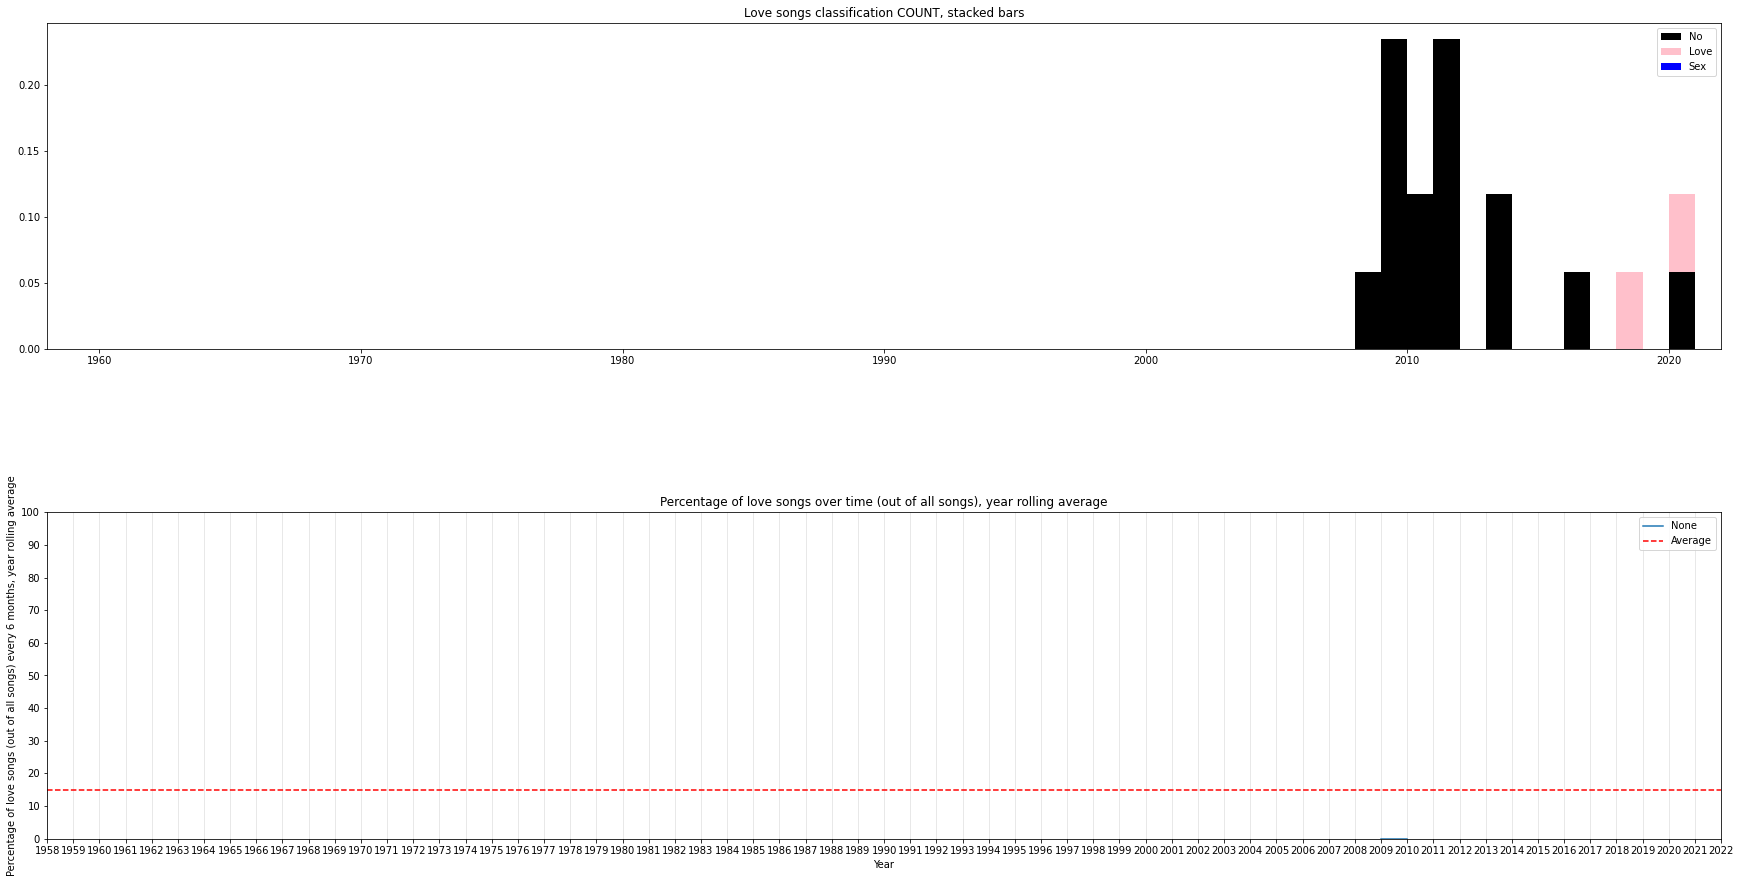

,performer,song,contains_word_love,generic_genre,gpt3_song_is_love_or_sex_or_no,gpt3_classification_rational,date_as_decimal,gender
2416,Lady Gaga,Alejandro,True,POP,no,electropop song,2010.38880,f
2417,Lady Gaga,Applause,True,POP,no,pop song,2013.73792,f
2418,Lady Gaga,Bad Romance,True,POP,no,pop song with dark elements,2009.97152,f
2419,Lady Gaga,Born This Way,True,POP,no,pop anthem about self-acceptance,2011.25344,f
2420,Lady Gaga,Dope,True,POP,no,emotional and introspective ballad,2013.96640,f
2421,Lady Gaga,Judas,True,POP,no,pop song,2011.42240,f
2422,Lady Gaga,LoveGame,True,POP,no,pop song with sexual references,2009.32576,f
2423,Lady Gaga,Million Reasons,False,POP,no,emotional ballad,2016.88800,f
2424,Lady Gaga,Paparazzi,True,POP,no,pop song with celebrity themes,2009.80256,f
2425,Lady Gaga,Poker Face,True,POP,no,electropop song with poker theme,2009.11648,f


In [194]:
viz_gpt_love_song_labeled_charts(
    gpt3_df[gpt3_df.performer.str.contains('Lady Gaga')].copy()
)

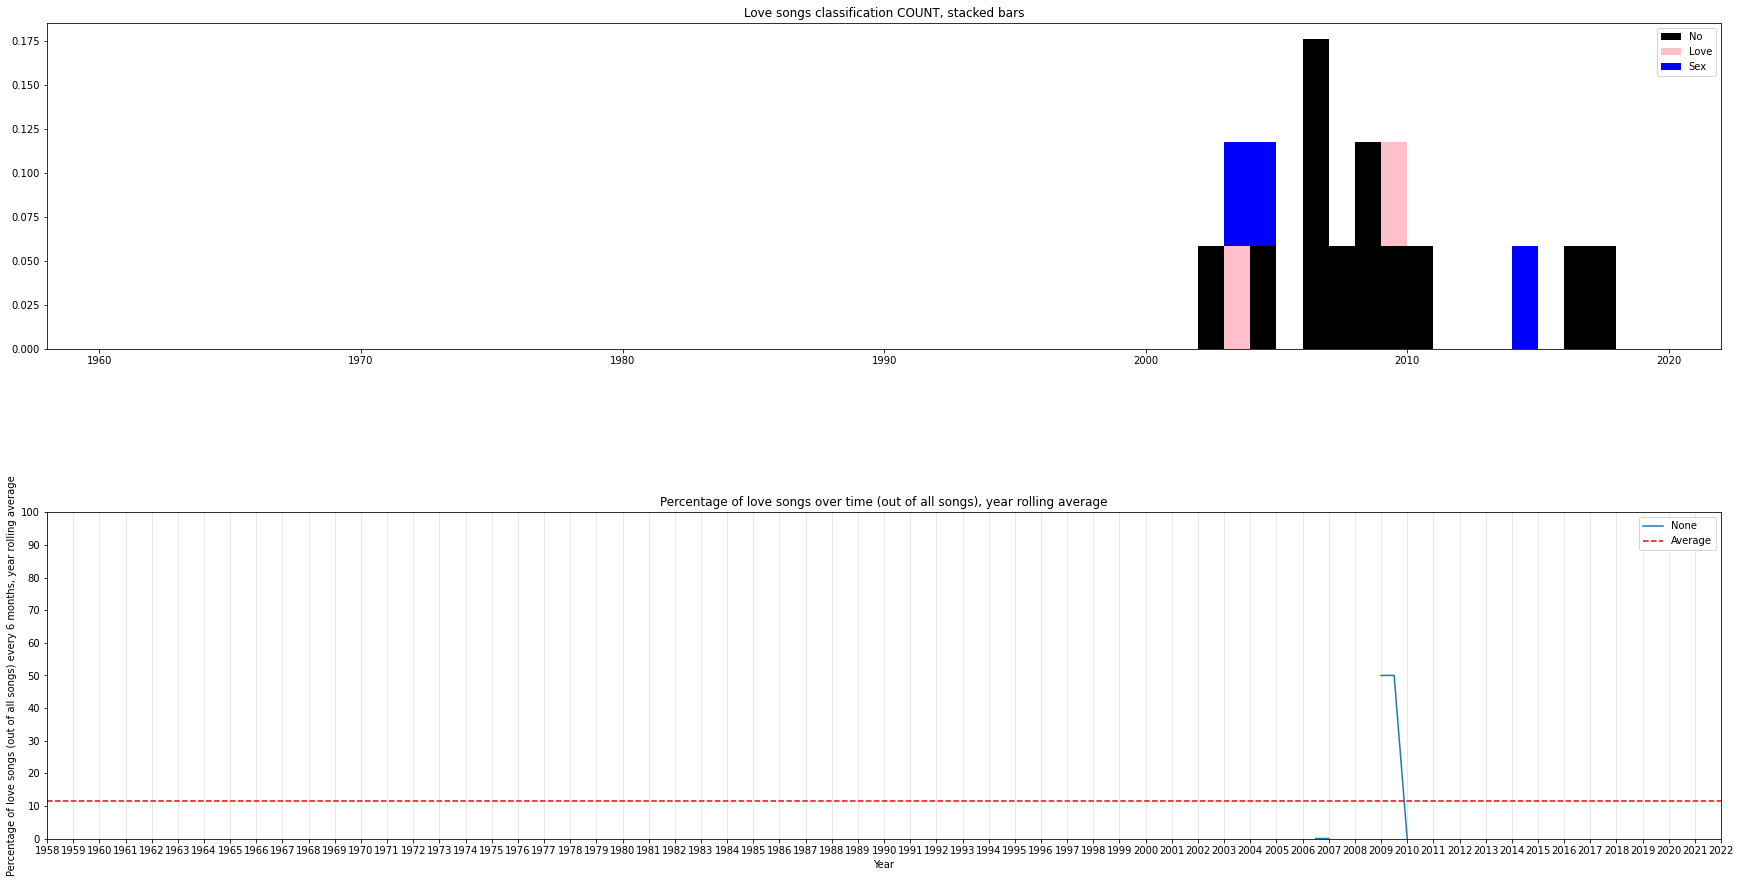

In [198]:
shhhh = viz_gpt_love_song_labeled_charts(
    gpt3_df[gpt3_df.performer.str.contains('Beyonce')].copy()
)

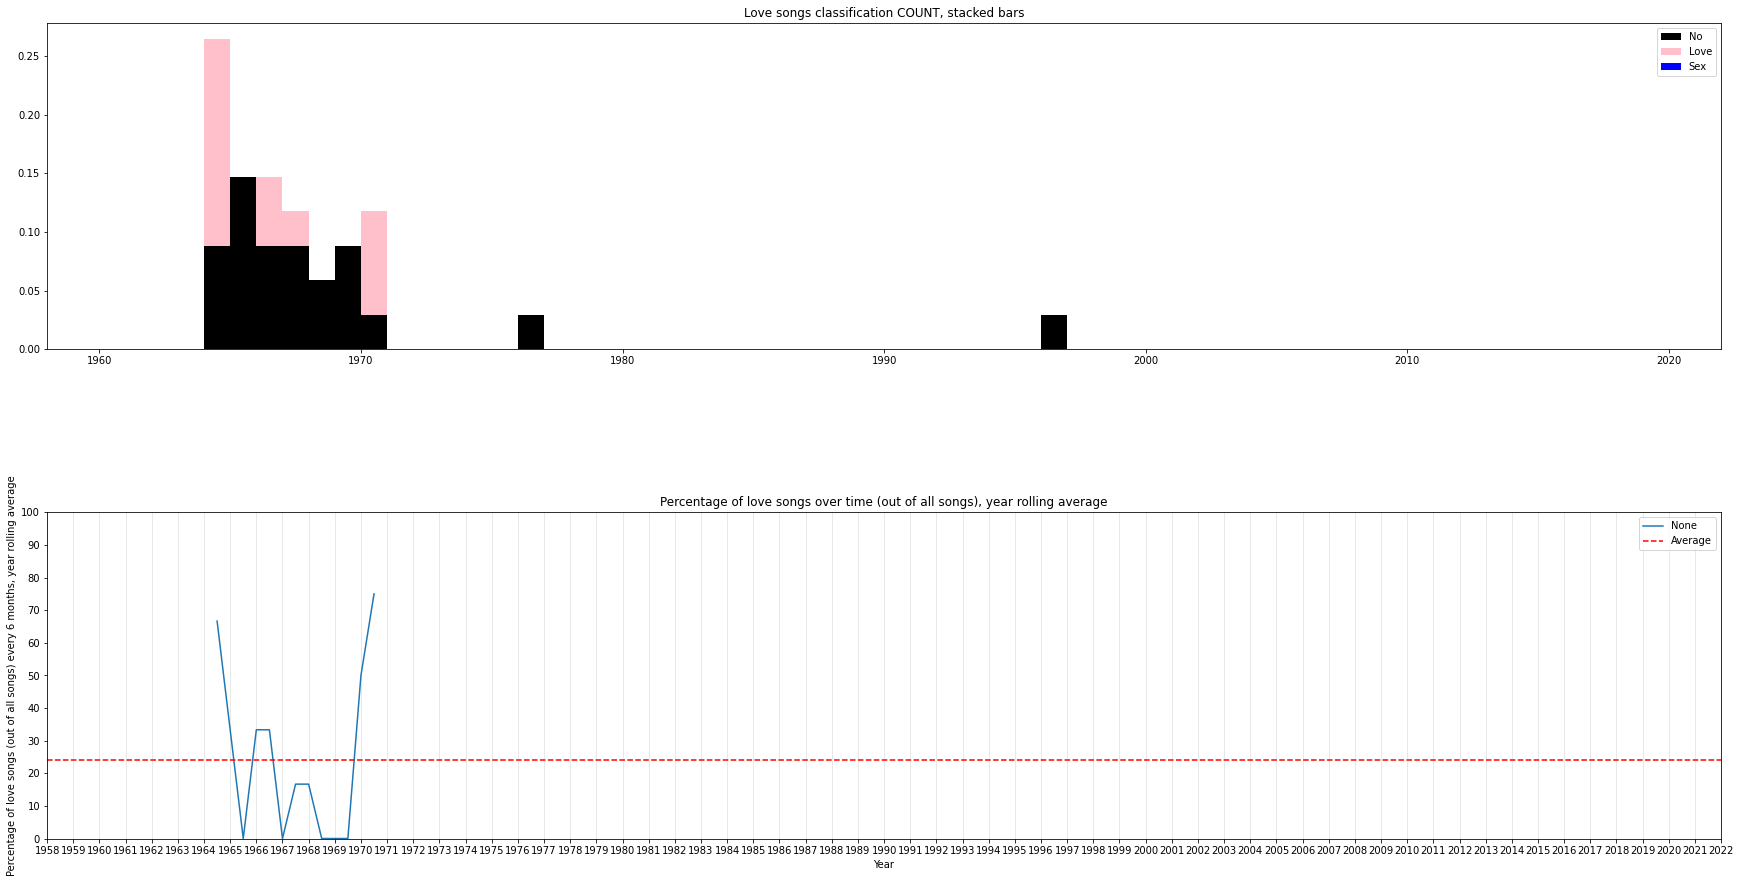

In [195]:
just_beatles_df = gpt3_df[gpt3_df.performer.str.contains('The Beatles')].copy()
shhhh = viz_gpt_love_song_labeled_charts(just_beatles_df)

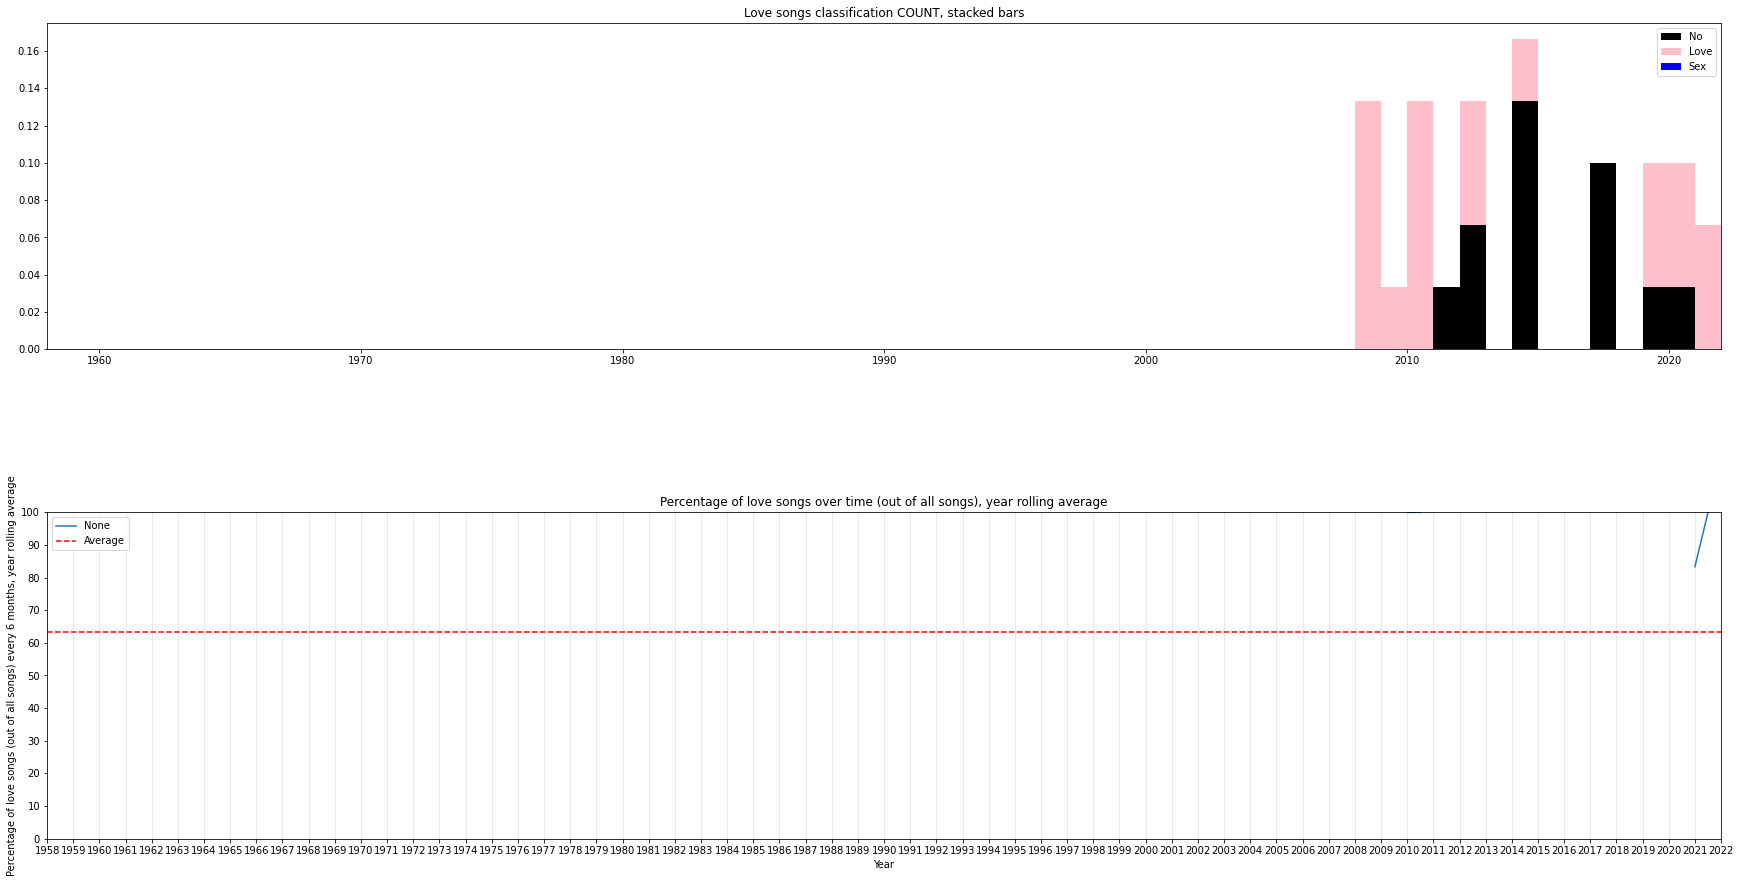

In [196]:
just_taylor_df = gpt3_df[gpt3_df.performer.str.contains('Taylor Swift')].copy()
shhhh = viz_gpt_love_song_labeled_charts(just_taylor_df)